<a href="https://www.kaggle.com/code/yaredlevi/clima-de-australia?scriptVersionId=254654401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Comprensión del negocio

## Historial de Revisión

| Versión | Autor      | Fecha      | Descripción                                  |
| ------- | ---------- | ---------- | -------------------------------------------- |
| 1.0     | Yared Levi | 2025-07-19 | Versión inicial del documento de comprensión |
|         |            |            |                                              |
|         |            |            |                                              |

## Antecedentes

ClimaSmart Analytics S.A. es una empresa dedicada a proveer soluciones de inteligencia de datos para el sector agroclimático. Uno de nuestros clientes clave es una cooperativa agrícola australiana interesada en mejorar su capacidad predictiva respecto a eventos de lluvia. Actualmente, dependen de informes diarios de estaciones meteorológicas, pero carecen de un modelo analítico que permita predecir con antelación si lloverá al día siguiente.

Nuestro objetivo es crear un modelo de clasificación predictivo que determine si lloverá mañana (RainTomorrow), utilizando datos meteorológicos históricos de distintas regiones de Australia.


## Objetivos Empresariales

- Mejorar la planificación agrícola mediante predicción temprana de lluvias.
- Reducir pérdidas por riego innecesario en días donde lloverá naturalmente.
- Integrar la predicción en un dashboard consultable por los agricultores.
- Ofrecer alertas automatizadas cuando se pronostique lluvia para el día siguiente.


## Criterios de Éxito Empresarial

- Alcanzar una precisión mínima del 80% en la predicción de lluvia del día siguiente.
- Disponer de visualizaciones claras del comportamiento histórico de lluvias.
- Entregar un prototipo funcional en un plazo de 8 semanas.
- Que el cliente pueda tomar decisiones de riego en base al modelo.


## Inventario de Recursos

### Personal

| Nombre      | Organización         | Rol                      | Información de Contacto |
| ----------- | -------------------- | ------------------------ | ----------------------- |
| Yared Levi  | ClimaSmart Analytics | Analista de Datos        | yared@climasmart.com    |
| Marta Silva | ClimaSmart Analytics | Coordinadora de Proyecto | marta@climasmart.com    |
| Joel Vargas | ClimaSmart Analytics | Experto Meteorológico    | joel@climasmart.com     |

### Datos

| Ubicación| Tipo de Almacenamiento | Descripción                                                  | Contactos                |
| --------------------------------- | ---------------------- | ------------------------------------------------------------ | ------------------------ |
| http://www.bom.gov.au/climate/data | CSV                    | Datos meteorológicos diarios de más de 10 años en múltiples ubicaciones de Australia. | Joel Vargas, Marta Silva |

### Software

- Python (Pandas, Scikit-learn, Matplotlib, Seaborn)
- Jupyter Notebooks
- Power BI (para reportes de visualización)
- GitHub (gestión de versiones y colaboración)

## Requisitos

- El proyecto debe completarse en 8 semanas.
- El modelo debe ser comprensible para el cliente: se requiere documentación y visualizaciones.
- Se deben aplicar transformaciones para valores nulos, codificación de variables categóricas y normalización.
- Se deben evaluar modelos de clasificación como Regresión Logística, Random Forest y Gradient Boosting.
- Se requiere exportar un archivo de predicción y un informe detallado de resultados.
- Se hará una evaluación de desempeño mediante precisión, recall y matriz de confusión.


## Suposiciones

- Se asume que los datos meteorológicos están completos o con valores faltantes mínimos.
- Se asume que la variable `RainTomorrow` puede representarse como un problema de clasificación binaria.
- Se supone que los datos históricos son representativos de las condiciones actuales y futuras.
- Se asume que la variable `RainToday` puede ser usada como predictor para `RainTomorrow`.


## Riesgos y Contingencias

| Riesgo                                          | Contingencia                                              |
| ----------------------------------------------- | --------------------------------------------------------- |
| Alta proporción de valores faltantes            | Imputación por mediana/media o eliminación de registros   |
| Desequilibrio en clases (más días sin lluvia)   | Aplicar técnicas de balanceo como sobremuestreo o SMOTE   |
| Modelo no supera el umbral del 80% de precisión | Ajuste de hiperparámetros, cambio de algoritmo o features |
| Retrasos en revisión por parte del cliente      | Reportes quincenales para asegurar feedback temprano      |

## Terminología

- **RainToday**: Indica si llovió hoy (Sí/No).
- **RainTomorrow**: Objetivo del modelo, indica si lloverá mañana (1/0).
- **Humidity**: Porcentaje de humedad relativa.
- **Pressure**: Presión atmosférica medida en hectopascales.
- **Evaporation**: Evaporación medida en mm durante el día.


## Costos y Beneficios

- **Costos**:
  - 160 horas de trabajo de analista de datos.
  - Infraestructura computacional en Google Colab (gratuita).
  - Supervisión y validación meteorológica interna.

- **Beneficios**:
  - Ahorro estimado de hasta un 15% en costos de agua por riego.
  - Mejora en la planificación de siembra y cosecha.
  - Reducción de impactos por lluvias no previstas.

## Objetivos del Proyecto

- Construir un modelo de clasificación que prediga `RainTomorrow` en función de variables meteorológicas diarias.
- Validar el modelo con técnicas como validación cruzada y evaluación de métricas.
- Generar visualizaciones interactivas para Power BI con insights climáticos.
- Documentar el pipeline de limpieza, exploración, modelado y despliegue básico.


## Resultados del Proyecto

- Modelo predictivo entrenado y validado exportado en formato `.pkl`.
- Reporte en Power BI con dashboard sobre lluvia, temperatura y viento.
- Script de Python reproducible con todo el pipeline de datos.
- Documento final de resultados y recomendaciones para el cliente.


## Criterios de Éxito del Proyecto

- El modelo predice `RainTomorrow` con al menos 80% de precisión y buen balance entre clases.
- Se entrega visualización clara y útil para el usuario final no técnico.
- El cliente puede aplicar el modelo con nuevos datos sin intervención del equipo técnico.

# Comprensión de Datos

## Análisis exploratorio

### Carga de librerias

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

### Carga de datos

In [2]:
dfbase = pd.read_csv("/kaggle/input/australia-weather-data/Weather Training Data.csv")



In [3]:
dfbase.shape

(99516, 23)

Hay 99516 registros y 23 columnas

In [4]:
dfbase.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Definición de etiquetas

- **Location**: Nombre de la ciudad de Australia.  
- **MinTemp**: Temperatura mínima durante un día en particular. (°C)  
- **MaxTemp**: Temperatura máxima durante un día en particular. (°C)  
- **Rainfall**: Precipitación durante un día en particular. (mm)  
- **Evaporation**: Evaporación durante un día en particular. (mm)  
- **Sunshine**: Horas de sol brillante durante un día en particular. (horas)
- **WindGustSpeed**: Velocidad de la ráfaga más fuerte durante un día en particular. (km/h)  
- **WindDir9am**: Dirección del viento durante 10 minutos antes de las 9 a. m. (puntos de la brújula)  
- **WindDir3pm**: Dirección del viento durante 10 minutos antes de las 3 p. m. (puntos de la brújula)  
- **WindSpeed9am**: Velocidad del viento durante 10 minutos antes de las 9 a. m. (km/h)  
- **WindSpeed3pm**: Velocidad del viento durante 10 minutos antes de las 3 p. m. (km/h)  
- **Humidity9am**: Humedad del aire a las 9 a. m. (porcentaje)  
- **Humidity3pm**: Humedad del aire a las 3 p. m. (porcentaje)  
- **Pressure9am**: Presión atmosférica a las 9 a. m. (hPa)  
- **Pressure3pm**: Presión atmosférica a las 3 p. m. (hPa)  
- **Cloud9am**: Partes del cielo cubiertas por nubes a las 9 a. m. (octavos)  
- **Cloud3pm**: Partes del cielo cubiertas por nubes a las 3 p. m. (octavos)  
- **Temp9am**: Temperatura a las 9 a. m. (°C)  
- **Temp3pm**: Temperatura a las 3 p. m. (°C)  
- **RainToday**: Si hoy es lluvioso, entonces "Sí". Si no, "No".  
- **RainTomorrow**: Si mañana es lluvioso, entonces `1` (Sí). Si no, `0` (No).

- **WindGustDir**: Dirección de la ráfaga más fuerte durante un día en particular. (16 puntos de brújula)

- **Norte (N):** Indica la dirección hacia el Polo Norte.
- **Este (E):** Indica la dirección hacia donde sale el sol.
- **Sur (S):** Indica la dirección hacia el Polo Sur.
- **Oeste (W):** Indica la dirección hacia donde se pone el sol.
- **Noreste (NE):** Entre el Norte y el Este.
- **Sureste (SE):** Entre el Sur y el Este.
- **Suroeste (SW):** Entre el Sur y el Oeste.
- **Noroeste (NW):** Entre el Norte y el Oeste.
- **Norte-Noreste (NNE)**
- **Este-Noreste (ENE)**
- **Este-Sureste (ESE)**
- **Sur-Sureste (SSE)**
- **Sur-Suroeste (SSW)**
- **Oeste-Suroeste (WSW)**
- **Oeste-Noroeste (WNW)**
- **Norte-Noroeste (NNW)**


### Pregunta 1

¿Cuál es la ciudad que sufrió la mayor cantidad de aguas lluvia en Australia?

#### Limpieza y transformación de datos

Para cada pregunta crearemos un Dataframe adicional con las columnas relevantes a la propia pregunta. En este caso, se utilizan las siguientes columnas:
+ Location (Ubicación)
+ Rainfall (Cantidad de precipitaciones)

In [5]:
df_pregunta1 = dfbase[['Location', 'Rainfall']]
df_pregunta1

,Location,Rainfall
0,Albury,0.6
1,Albury,0.0
2,Albury,1.0
3,Albury,0.2
4,Albury,0.0
...,...,...
99511,Uluru,0.0
99512,Uluru,0.0
99513,Uluru,0.0
99514,Uluru,0.0


In [6]:
df_pregunta1.dtypes

Location     object
Rainfall    float64
dtype: object

La columna Location es una variable cualitativa y Rainfall una variable cuantitativa

In [7]:
df_pregunta1.isnull().sum()

Location      0
Rainfall    979
dtype: int64

La columna RainFall posee 979 valores nulos y la columna Location no presenta nulos.

##### Tratamiento columna Rainfall

Este apartado corresponde al tratamiento de los datos de la columna *Rainfall*.


In [8]:
df_pregunta1.Rainfall.unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       3.600e+00,       nan, 1.680e+01, 1.060e+01, 1.200e+00, 6.400e+00,
       3.000e+00, 5.800e+00, 4.000e-01, 1.800e+00, 8.600e+00, 8.400e+00,
       2.000e+01, 2.100e+01, 3.200e+00, 4.800e+00, 4.200e+00, 8.000e-01,
       8.000e+00, 1.440e+01, 4.600e+00, 2.000e+00, 5.600e+00, 1.600e+00,
       6.000e+00, 5.400e+00, 5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00,
       2.400e+00, 5.200e+00, 6.600e+00, 3.800e+00, 1.340e+01, 1.020e+01,
       2.880e+01, 7.000e+00, 9.400e+00, 5.220e+01, 6.600e+01, 1.100e+01,
       1.160e+01, 2.140e+01, 6.200e+00, 7.200e+00, 8.200e+00, 1.080e+01,
       1.540e+01, 4.000e+00, 2.180e+01, 2.480e+01, 1.140e+01, 1.900e+01,
       2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01, 1.920e+01,
       1.880e+01, 1.480e+01, 1.840e+01, 2.560e+01, 1.380e+01, 9.920e+01,
       5.100e+01, 3.980e+01, 2.820e+01, 1.220e+01, 1.280e+01, 1.980e+01,
       1.740e+01, 8.800e+00, 2.600e+00, 4.400e+00, 

Podemos considerar que el valor númerico 0 no es el equivalente a un valor nulo.

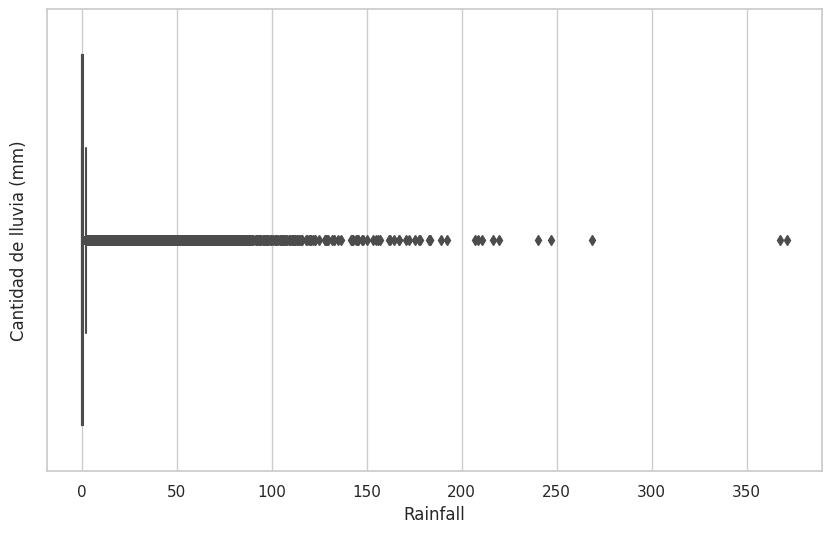

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pregunta1, x='Rainfall')
plt.ylabel('Cantidad de lluvia (mm)')
plt.show()

Se observa que la variable Rainfall posee valores atípicos. Se reemplazan los valores nulos por la mediana.

In [10]:
mediana = df_pregunta1['Rainfall'].median()
df_pregunta1['Rainfall'].fillna(mediana, inplace=True)

In [11]:
df_pregunta1.Rainfall.isnull().sum()

0

Finaliza el tratamiento de la columna Rainfall.

##### Tratamiento columna Location

Este apartado corresponde al tratamiento de los datos de la columna Rainfall.

In [12]:
df_pregunta1['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Se observa que la variable Location posee 49 ciudades. No se observan valores nulos.
Formatos correctos.

#### Análisis exploratorio de datos

##### Cálculo e interpretación de las medidas de básicas

###### Variables numéricas

In [13]:
medidas = df_pregunta1.Rainfall.describe()
medidas

count    99516.000000
mean         2.329876
std          8.449204
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        371.000000
Name: Rainfall, dtype: float64

**Observaciones**
- La cantidad de lluvia promedio es de 2.349974 mm.
- La cantidad de lluvia mínima es de 0 mm.
- La cantidad de lluvia máxima es de 371 mm.
- La cantidad de lluvia en el primer cuartil es de 0.8 mm.

###### Variables categóricas

In [14]:
df_pregunta1['Location'].describe()

count        99516
unique          49
top       Canberra
freq          2393
Name: Location, dtype: object

**Observación**
- La ciudad con mayor cantidad de registros es Canberra con 3418 registros.

##### Representación gráfica

In [ ]:
agrupacion = df_pregunta1.groupby('Location').sum().sort_values(by='Rainfall', ascending=False)
agrupacion= agrupacion.reset_index()

ejex = agrupacion.Location
ejey = agrupacion.Rainfall

plt.figure(figsize=(20, 10))
plt.bar(ejex, ejey, color='blue')
plt.xlabel("Ubicación",size=20)
plt.xticks(rotation=90,size=18)
plt.ylabel("Cantidad de lluvia (mm)",size=20)
plt.yticks(rotation=90,size=18)
plt.title("Precipitaciones por Ubicación",size=30)
plt.show()


#### Contestación de la pregunta


In [ ]:
agrupacion.head(1)

,Location,Rainfall
0,Cairns,11803.2


La ciudad que sufrío la mayor cantidad de aguas lluvia en Australia es Cairns con 11803.2 mm.

### Pregunta 2

¿Cuál es el promedio de humedad para los días completamente nublados?

####    Limpieza y transformación de datos

Para responder a esta pregunta, se utilizan las siguientes columnas:
+ Humidity9am
+ Humidity3pm
+ Cloud9am
+ Cloud3pm

In [ ]:
pregunta2 = dfbase[['Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm']]
pregunta2

,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm
0,8.0,NaN,71.0,22.0
1,NaN,NaN,44.0,25.0
2,7.0,8.0,82.0,33.0
3,NaN,NaN,55.0,23.0
4,NaN,NaN,48.0,19.0
...,...,...,...,...
99511,NaN,7.0,56.0,32.0
99512,NaN,NaN,59.0,27.0
99513,NaN,NaN,51.0,24.0
99514,NaN,NaN,56.0,21.0


In [ ]:
pregunta2.isnull().sum()

Cloud9am       37572
Cloud3pm       40002
Humidity9am     1233
Humidity3pm     2506
dtype: int64

Todas las variables poseen valores nulos.

##### Tratamiento columna Humidity9am

In [ ]:
pregunta2.Humidity9am.unique()

array([ 71.,  44.,  82.,  55.,  48.,  58.,  89.,  65.,  50.,  69.,  80.,
        47.,  45.,  38.,  54.,  49.,  41.,  56.,  78.,  43.,  34.,  36.,
        51.,  46.,  33.,  27.,  32.,  53.,  39.,  20.,  37.,  63.,  60.,
        52.,  57.,  76.,  87.,  61.,  59.,  92.,  72.,  67.,  75.,  68.,
        74.,  83.,  77.,  62.,  70.,  81.,  86.,  97.,  99.,  91.,  93.,
        88.,  84.,  94.,  85.,  79.,  98.,  95.,  73.,  90.,  66.,  42.,
        29.,  64.,  40.,  21.,  96., 100.,  24.,  25.,  nan,  35.,  28.,
        31.,  30.,  26.,  19.,  22.,  23.,  17.,  15.,   9.,  12.,  18.,
        16.,   6.,  14.,  11.,   7.,  13.,  10.,   8.,   3.,   5.,   4.,
         0.,   2.,   1.])

Descartamos la posibilidad de que los nulos correspondan al valor 0.

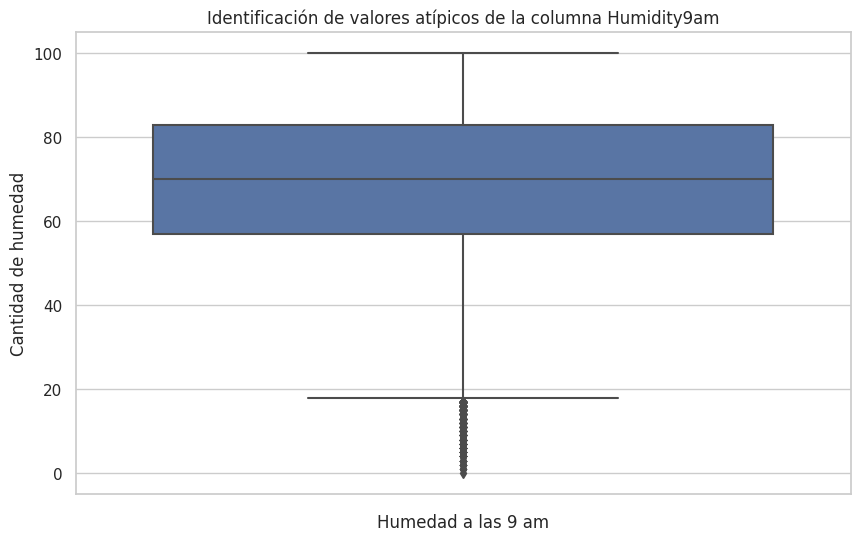

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta2, y='Humidity9am')
plt.title(r'Identificación de valores atípicos de la columna Humidity9am')
plt.xlabel('Humedad a las 9 am')
plt.ylabel('Cantidad de humedad')
plt.show()

Se observa que la variable Humidity9am posee valores atípicos. Se reemplazan los valores nulos por la mediana.

In [ ]:
mediana = pregunta2['Humidity9am'].median()
pregunta2['Humidity9am'].fillna(mediana, inplace=True)
pregunta2.Humidity9am.isnull().sum()

0

Sin nulls, se procede a realizar el mismo procedimiento con la variable Humidity3pm.

##### Tratamiento columna Humidity3pm

In [ ]:
pregunta2.Humidity3pm.unique()

array([ 22.,  25.,  33.,  23.,  19.,  27.,  91.,  43.,  28.,  82.,  65.,
        32.,  26.,  24.,  17.,  15.,  70.,  12.,  16.,  20.,  21.,  10.,
        13.,  11.,   9.,   8.,  30.,  18.,  39.,  14.,  35.,  90.,  68.,
        74.,  34.,  78.,  49.,  37.,  42.,  47.,  29.,  86.,  89.,  62.,
        79.,  48.,  46.,  38.,  51.,  44.,  36.,  45.,  40.,  53.,  61.,
        63.,  57.,  58.,  75.,  80.,  95.,  56.,  72.,  60.,  52.,  71.,
        81.,  76.,  69.,  73.,  64.,  59.,  87.,  85.,  67.,  54.,  55.,
        77.,  50.,  84.,  31.,   7.,  93.,  41.,  92.,  66.,  83.,  94.,
        96.,  nan, 100.,  88.,  98.,  99.,  97.,   5.,   6.,   1.,   4.,
         2.,   3.,   0.])

Descartamos la posibilidad de que los nulos correspondan al valor 0.


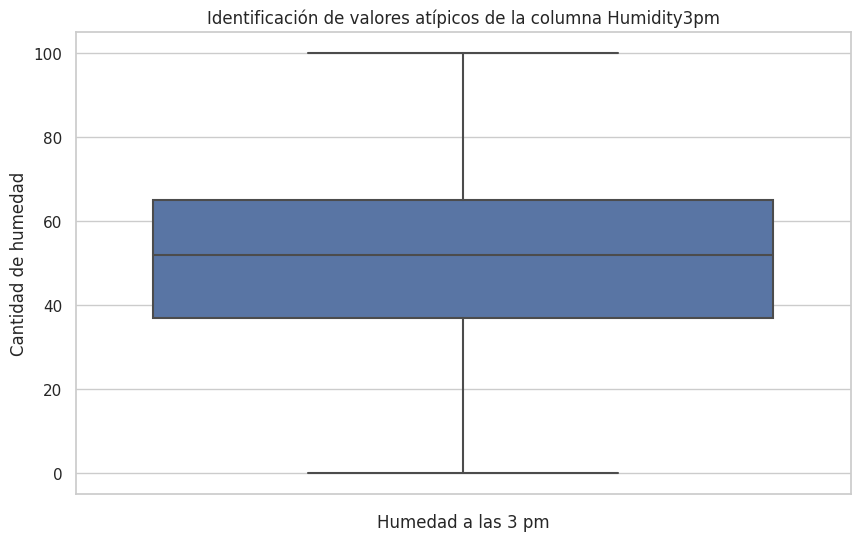

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta2, y='Humidity3pm')
plt.title(r'Identificación de valores atípicos de la columna Humidity3pm')
plt.xlabel('Humedad a las 3 pm')
plt.ylabel('Cantidad de humedad')
plt.show()

Se observa que la variable Humidity3pm posee valores no atípicos. Se reemplazan los valores nulos por la media.

In [24]:
media = pregunta2['Humidity3pm'].mean()
pregunta2['Humidity3pm'].fillna(media, inplace=True)
pregunta2.Humidity3pm.isnull().sum()

0

Sin nulls, se procede a realizar el mismo procedimiento con la variable Cloud9am.

##### Tratamiento columna Cloud9am

In [25]:
pregunta2.Cloud9am.unique()

array([ 8., nan,  7.,  0.,  5.,  6.,  3.,  4.,  1.,  2.,  9.])

Descartamos la posibilidad de que los nulos correspondan al valor 0.


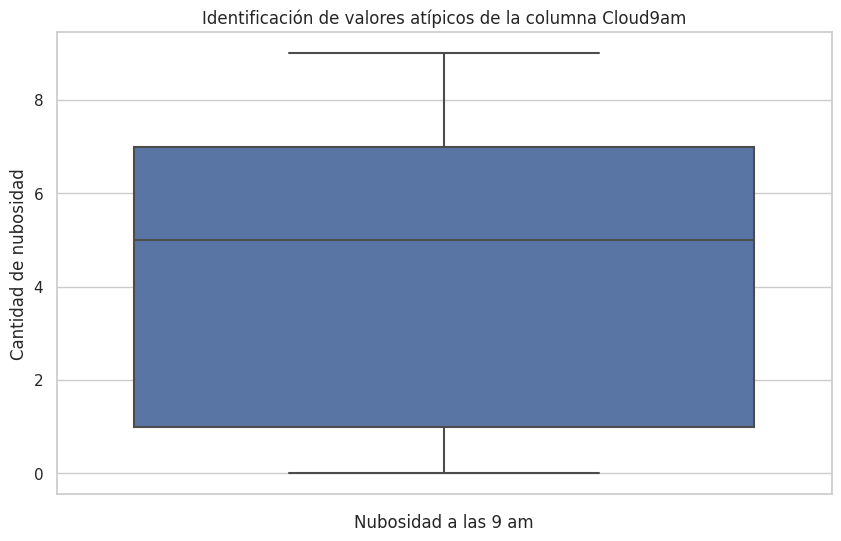

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta2, y='Cloud9am')
plt.title(r'Identificación de valores atípicos de la columna Cloud9am')
plt.xlabel('Nubosidad a las 9 am')
plt.ylabel('Cantidad de nubosidad')
plt.show()

Se observa que la variable Cloud9am posee valores no atípicos. Se reemplazan los valores nulos por la media.

In [27]:
media = pregunta2['Cloud9am'].mean()
pregunta2['Cloud9am'].fillna(media, inplace=True)
pregunta2.Cloud9am.isnull().sum()

0

Sin nulls, se procede a realizar el mismo procedimiento con la variable Cloud3pm.

##### Tratamiento columna Cloud3pm

In [28]:
pregunta2.Cloud3pm.unique()

array([nan,  8.,  7.,  1.,  2.,  5.,  4.,  6.,  3.,  0.,  9.])

Descartamos la posibilidad de que los nulos correspondan al valor 0.


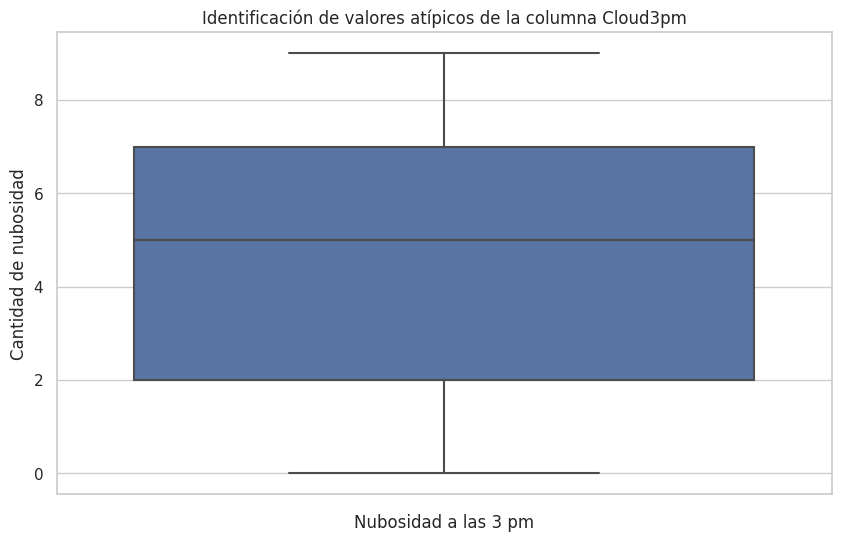

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta2, y='Cloud3pm')
plt.title(r'Identificación de valores atípicos de la columna Cloud3pm')
plt.xlabel('Nubosidad a las 3 pm')
plt.ylabel('Cantidad de nubosidad')
plt.show()

Se observa que la variable Cloud3pm posee valores no atípicos. Se reemplazan los valores nulos por la media.

In [30]:
media = pregunta2['Cloud3pm'].mean()
pregunta2['Cloud3pm'].fillna(media, inplace=True)
pregunta2.Cloud3pm.isnull().sum()

0

Sin nulls, tratamiento terminado.

##### Creación de columnas adicionales

###### Columna "HumedadProm"

A continuación crearemos una columna con el promedio entre la humedad a las 9 AM y a las 3 PM.

In [31]:
listaHumedadProm=[]
for i in range(0,len(pregunta2)):
    listaHumedadProm.append((pregunta2['Humidity9am'][i]+pregunta2['Humidity3pm'][i])/2)
    
pregunta2.insert(4, "HumedadProm", listaHumedadProm)
pregunta2

,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,HumedadProm
0,8.000000,4.519122,71.0,22.0,46.5
1,4.447985,4.519122,44.0,25.0,34.5
2,7.000000,8.000000,82.0,33.0,57.5
3,4.447985,4.519122,55.0,23.0,39.0
4,4.447985,4.519122,48.0,19.0,33.5
...,...,...,...,...,...
99511,4.447985,7.000000,56.0,32.0,44.0
99512,4.447985,4.519122,59.0,27.0,43.0
99513,4.447985,4.519122,51.0,24.0,37.5
99514,4.447985,4.519122,56.0,21.0,38.5


###### Columna "Nubosidad"

Con el objetivo de clasificar las mediciones de acuerdo a la cobertura del cielo (medida en octavos), crearemos una columna para almacenar dicha información.

In [32]:
listaNubosidadProm=[]
for i in range(0,len(pregunta2)):
    nubosidadPromedio= ((pregunta2.Cloud9am.iloc[i]+pregunta2.Cloud3pm.iloc[i])/2)
    if nubosidadPromedio >= 8:
        listaNubosidadProm.append('Completamente nublado')
    elif 8 > nubosidadPromedio >= 6:
        listaNubosidadProm.append('Parcialmente nublado')
    elif 6 > nubosidadPromedio >= 4:
        listaNubosidadProm.append('Nublado')
    elif 4 > nubosidadPromedio >= 1:
        listaNubosidadProm.append('Poco nublado')
    else:
        listaNubosidadProm.append('Despejado')

pregunta2.insert(2, "Nubosidad", listaNubosidadProm)
pregunta2

,Cloud9am,Cloud3pm,Nubosidad,Humidity9am,Humidity3pm,HumedadProm
0,8.000000,4.519122,Parcialmente nublado,71.0,22.0,46.5
1,4.447985,4.519122,Nublado,44.0,25.0,34.5
2,7.000000,8.000000,Parcialmente nublado,82.0,33.0,57.5
3,4.447985,4.519122,Nublado,55.0,23.0,39.0
4,4.447985,4.519122,Nublado,48.0,19.0,33.5
...,...,...,...,...,...,...
99511,4.447985,7.000000,Nublado,56.0,32.0,44.0
99512,4.447985,4.519122,Nublado,59.0,27.0,43.0
99513,4.447985,4.519122,Nublado,51.0,24.0,37.5
99514,4.447985,4.519122,Nublado,56.0,21.0,38.5


#### Análisis exploratorio de datos

##### Cálculo e interpretación de las medidas de básicas

###### Variable numérica

In [33]:
pregunta2.describe()

,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,HumedadProm
count,99516.000000,99516.000000,99516.000000,99516.000000,99516.000000
mean,4.447985,4.519122,68.880421,51.433296,60.156858
std,2.277380,2.100827,18.956828,20.514336,17.975730
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,57.000000,37.000000,49.000000
50%,4.447985,4.519122,70.000000,51.433296,61.000000
75%,6.000000,6.000000,83.000000,65.000000,73.000000
max,9.000000,9.000000,100.000000,100.000000,100.000000


**Observaciones**
* La mitad de los días poseen una humedad promedio de 61%.


###### Variable Categórica

In [34]:

pregunta2.Nubosidad.describe()

count       99516
unique          5
top       Nublado
freq        50337
Name: Nubosidad, dtype: object

**Observaciones**
- En su mayoría los días son nublados.

##### Representación gráfica

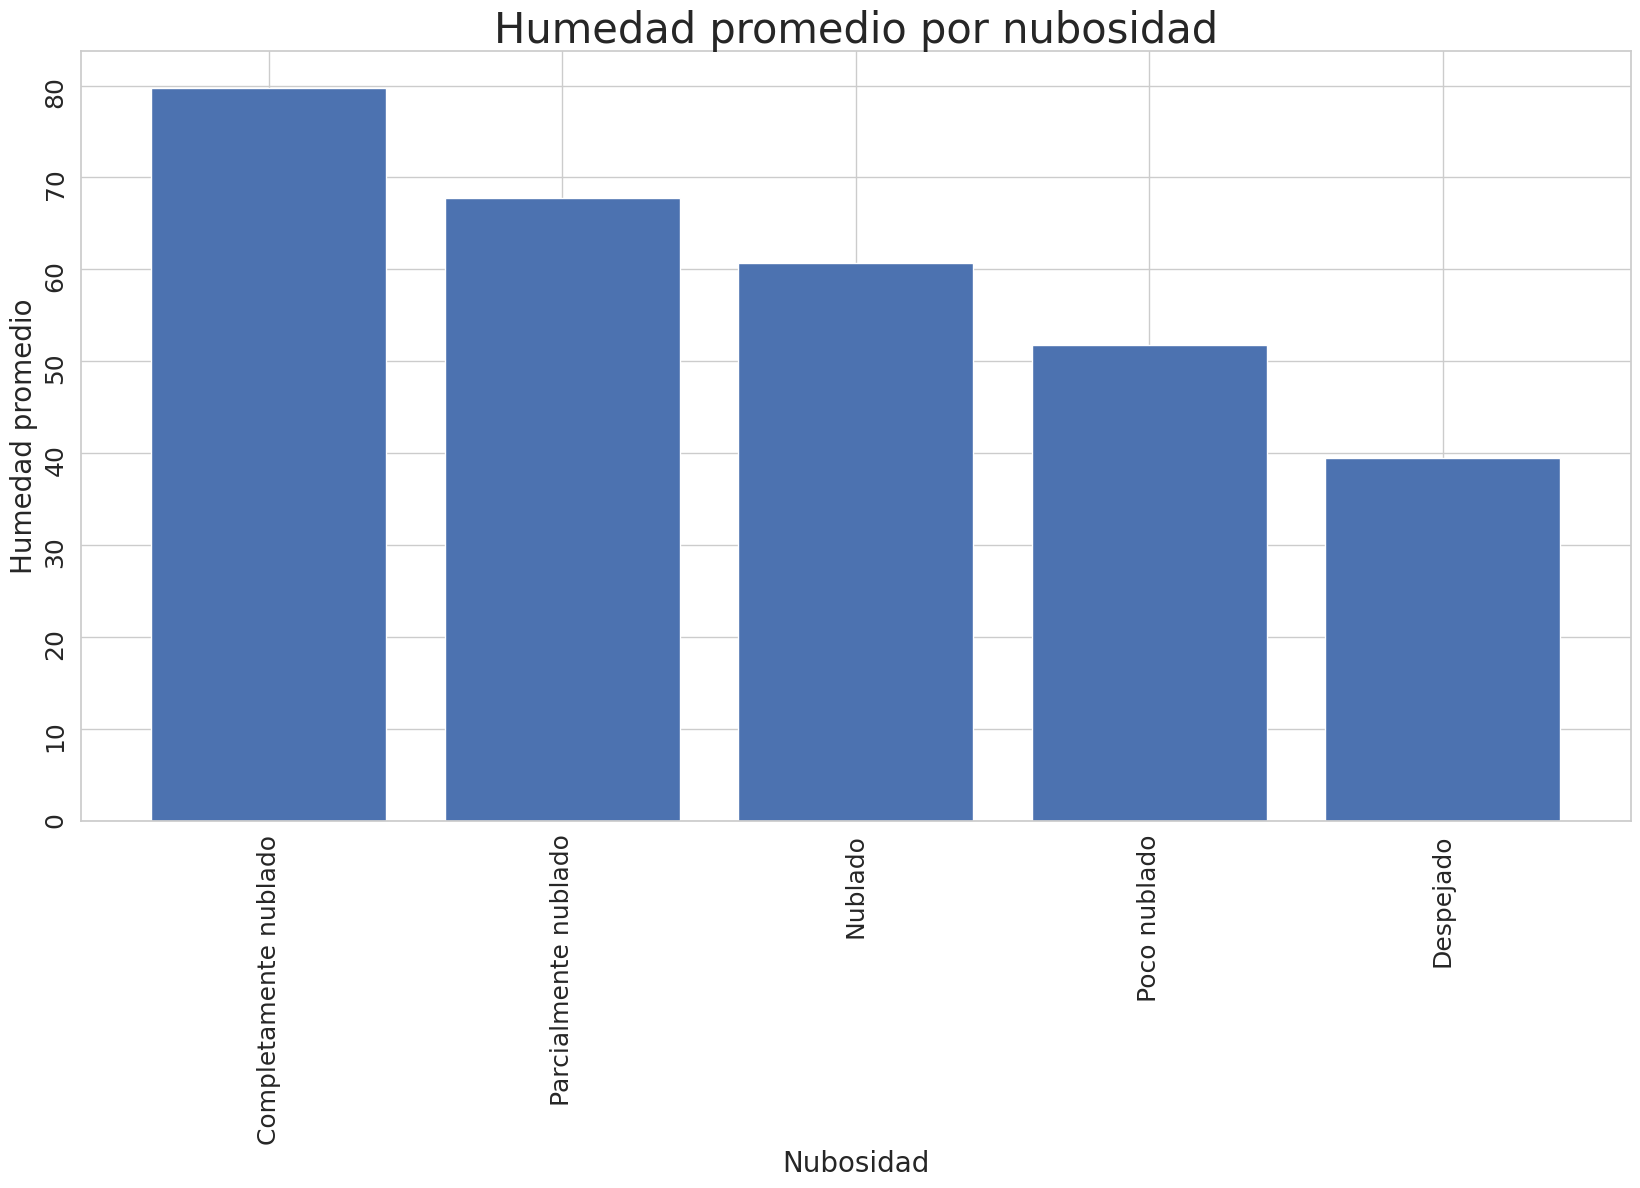

In [35]:
agrupacion2 = pregunta2[['Nubosidad', 'HumedadProm']].groupby('Nubosidad').mean().sort_values(by='HumedadProm', ascending=False)
agrupacion2= agrupacion2.reset_index()

ejex = agrupacion2.Nubosidad
ejey = agrupacion2.HumedadProm

plt.figure(figsize=(20, 10))
plt.bar(ejex, ejey)
plt.xlabel("Nubosidad",size=20)
plt.xticks(rotation=90,size=18)
plt.ylabel("Humedad promedio",size=20)
plt.yticks(rotation=90,size=18)
plt.title("Humedad promedio por nubosidad",size=30)
plt.show()

#### Contestación de la pregunta

In [36]:
agrupacion2.head(1)

,Nubosidad,HumedadProm
0,Completamente nublado,79.739522


La humedad promedio para los días completamente nublados es cercana al 80%.

* La nubosidad contribuye a la humedad ambiente, siendo los días nublados los que presentan mayor humedad y los despejados los que presentan menor humedad.

### Pregunta 3
¿Cuáles fueron las ciudades con mayor temperatura máxima en Australia?


Haremos uso de las siguientes dos columnas:
- Location
- MaxTemp

#### Limpieza y transformación de datos

In [37]:
pregunta3 = dfbase[['Location', 'MaxTemp']]
pregunta3

,Location,MaxTemp
0,Albury,22.9
1,Albury,25.1
2,Albury,32.3
3,Albury,29.7
4,Albury,26.7
...,...,...
99511,Uluru,20.7
99512,Uluru,21.8
99513,Uluru,23.4
99514,Uluru,25.3


In [38]:
pregunta3.isnull().sum()

Location      0
MaxTemp     230
dtype: int64

##### Tratamiento columna MaxTemp

In [39]:
pregunta3.MaxTemp.unique()

array([22.9, 25.1, 32.3, 29.7, 26.7, 30.1, 30.4, 21.7, 21. , 27.7, 20.9,
       22.5, 25.6, 33. , 31.8, 30.9, 32.4, 32.7, 27.2, 24.2, 23.9, 28.8,
       34.6, 38.9, 28.3, 28.4, 30.8, 34.7, 37.7, 32.2, 39.9, 35.2, 30.6,
       34.3, 38.4, 41.5, 42.7, 43.1, 38.3, 36.9, 42.2, 44.8, 40.2, 27.3,
       29. , 29.2, 31.1, 32. , 34. , 29.1, 31.7, 33.2, 29.6, 32.6, 30.3,
       31.9, 22. , 24. , 27.9, 30.2, 30.5, 25.7, 25.8, 27. , 21.9, 25.3,
       28. , 33.6, 30. , 31.6, 22.3, 29.8, 27.6, 28.9, 31.2, 29.9, 28.1,
       21.4, 24.9, 25.4, 25. , 20. , 21.6, 16.2, 15.8, 12.9, 11.5, 14.5,
       12.2, 16.5, 19.2, 18.9, 19.1, 18.8, 19.3, 19. , 20.5, 19.5, 17.7,
       18.5, 15.1, 16.6, 15.6, 19.7, 18.6, 19.8, 18.1, 15.7, 16.8, 13.4,
       17.4, 16.1, 10.5, 11.6, 12. ,  8.8,  9.6,  8.2, 12.4, 14.9, 15.9,
       14.7, 15.3, 17.3, 17. , 15.5, 14.1, 11.9, 12.3, 13.3, 13.2, 12.1,
       13.5, 13.1, 11. , 14.4,  9.8, 13.9, 13.8, 17.1, 14.3, 15.2, 13.6,
       16.4, 18.4, 14.8, 12.8, 16.7, 11.1, 16.9, 15

Confirmamos que los valores nulos no corresponden a 0.

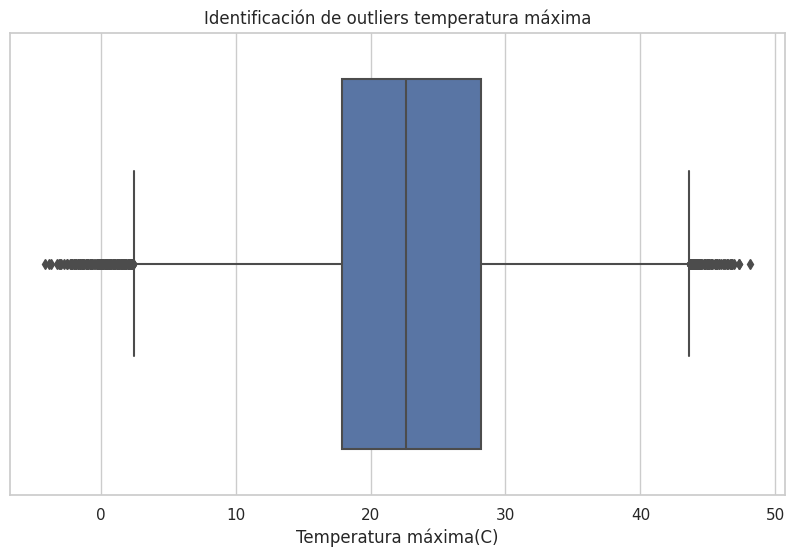

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta3, x='MaxTemp')
plt.xlabel('Temperatura máxima(C)')
plt.title('Identificación de outliers temperatura máxima')
plt.show()

Se observa que la variable MaxTemp posee valores atípicos. Se reemplazan los valores nulos por la mediana.

In [41]:
medianap3 = pregunta3['MaxTemp'].median()
pregunta3['MaxTemp'].fillna(medianap3, inplace=True)
pregunta3.MaxTemp.isnull().sum()

0

#### Análisis exploratorio de datos

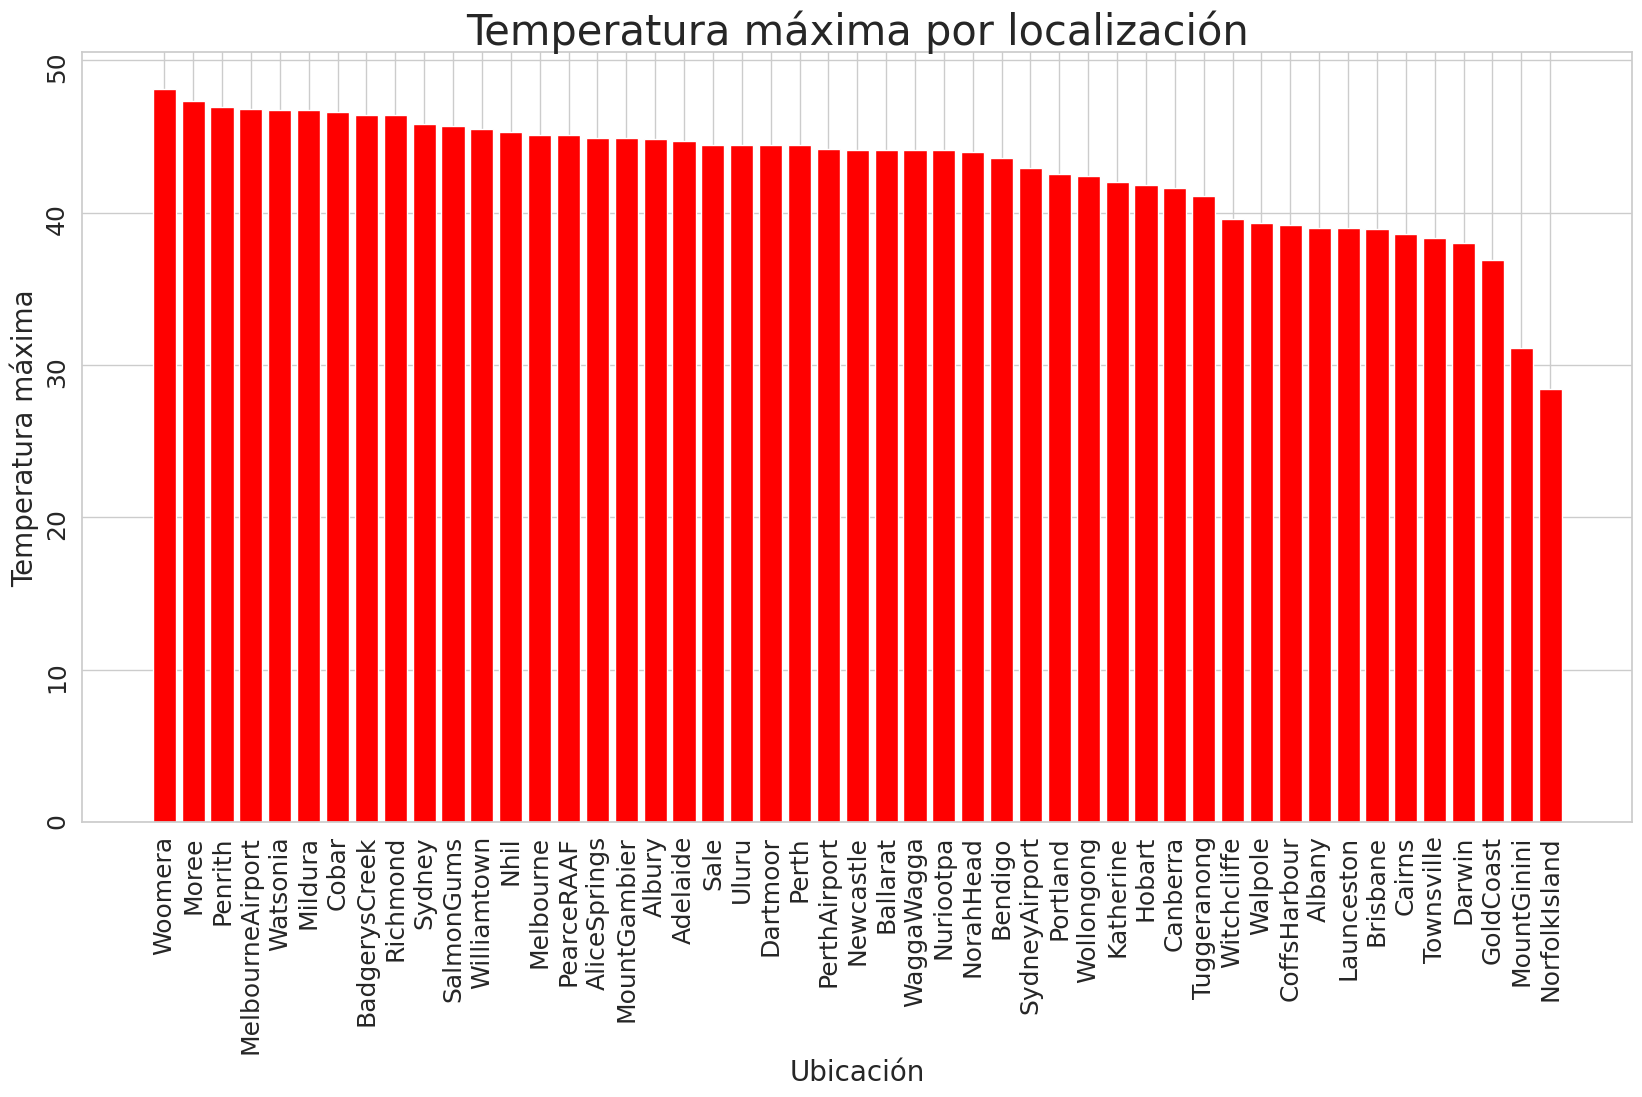

In [42]:
pregunta3 =  pregunta3[['Location', 'MaxTemp']].groupby('Location').max().sort_values(by='MaxTemp', ascending=False)
pregunta3= pregunta3.reset_index()

ejex = pregunta3.Location
ejey = pregunta3.MaxTemp
plt.figure(figsize=(20, 10))
plt.bar(ejex, ejey, color='red')
plt.xlabel("Ubicación",size=20)
plt.xticks(rotation=90,size=18)
plt.ylabel("Temperatura máxima",size=20)
plt.yticks(rotation=90,size=18)
plt.title("Temperatura máxima por localización",size=30)
plt.show()

#### Contestación de la pregunta

In [43]:
pregunta3.head(1)

,Location,MaxTemp
0,Woomera,48.1


La temperatura máxima más alta en Australia se registró en Woomera con 48.1°C.

### Pregunta 4

¿Cúales son las ciudades con la temperatura mínima más baja en Australia?

In [44]:
pregunta4 = dfbase[['Location', 'MinTemp']]
pregunta4

,Location,MinTemp
0,Albury,13.4
1,Albury,7.4
2,Albury,17.5
3,Albury,14.6
4,Albury,7.7
...,...,...
99511,Uluru,8.0
99512,Uluru,3.5
99513,Uluru,2.8
99514,Uluru,3.6


In [45]:
pregunta4.isnull().sum()

Location      0
MinTemp     443
dtype: int64

#### Limpieza y transformación de datos

##### Tratamiento columna MinTemp

In [46]:
pregunta4.MinTemp.unique()

array([13.4,  7.4, 17.5, 14.6,  7.7, 13.1, 15.9, 12.6,  9.8, 14.1, 13.5,
       11.2, 17.1, 20.5, 15.3, 16.9, 20.1, 19.7, 12.5,  9.6, 10.5, 12.3,
       16.1, 14. , 17. , 17.3, 17.2, 19.8, 14.9, 11.3, 18.6, 18.8, 20.8,
       15.7, 21.8, 22. , 28. , 24.4, 21.7, 23.5, 22.3, 28.3, 12.4, 18. ,
       16.2, 18.7, 13.7, 15.5, 14.3, 12.9, 15. , 15.4, 12.8, 13.2, 11.5,
        7.6,  8.3, 11. , 13.8, 18.4, 20.9, 16.4,  8.8,  8.4,  9.3, 14.4,
       13.3, 10.1,  9.1, 10.4, 12.2,  7.8,  8.1,  7.5,  8.2, 11.6, 13. ,
        9.9,  3.5,  6.6,  5.7,  6. , 10.6,  8.6,  4.5,  5.4,  2.1,  7.2,
        4.6,  4.2,  5.2,  4.1,  4.3,  3.7,  3.6, 10.3,  3. ,  2.6,  5.1,
        4.4,  4.7,  6.2,  8. ,  2.2,  8.9,  2.8,  1.7,  9. ,  6.3, -2. ,
       -1.3,  1.8,  2. ,  0.5,  1.2,  0.6,  0.9,  7. ,  5. ,  3.9,  0. ,
        0.1,  5.9,  6.9, -0.3, -1. ,  3.2,  0.8, -0.1,  1.3,  6.5,  6.8,
        1.6,  5.5,  7.3,  0.2,  5.8,  7.1,  1.1,  1. ,  nan,  8.5,  3.8,
        6.4,  9.5,  9.7, 10.8, 14.5, 15.6, 17.8, 10

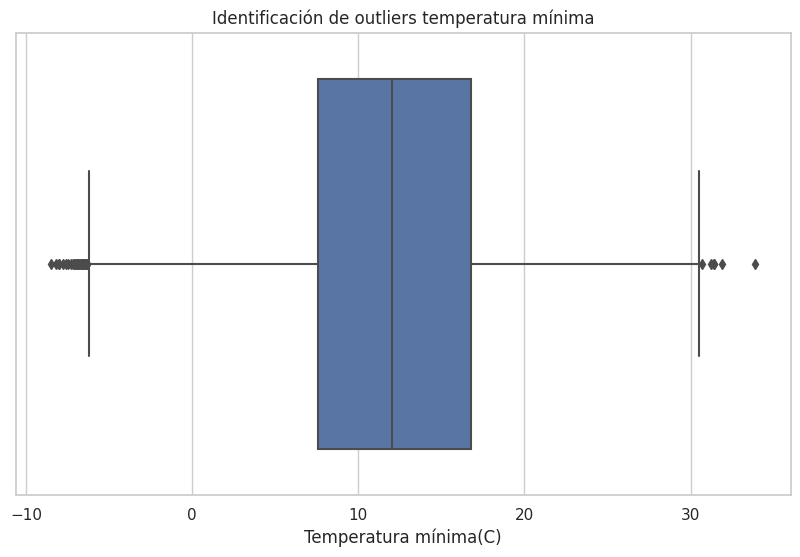

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta4, x='MinTemp')
plt.xlabel('Temperatura mínima(C)')
plt.title('Identificación de outliers temperatura mínima')
plt.show()

In [48]:
mediana = pregunta4['MinTemp'].median()
pregunta4['MinTemp'].fillna(mediana, inplace=True)
pregunta4.MinTemp.isnull().sum()

0

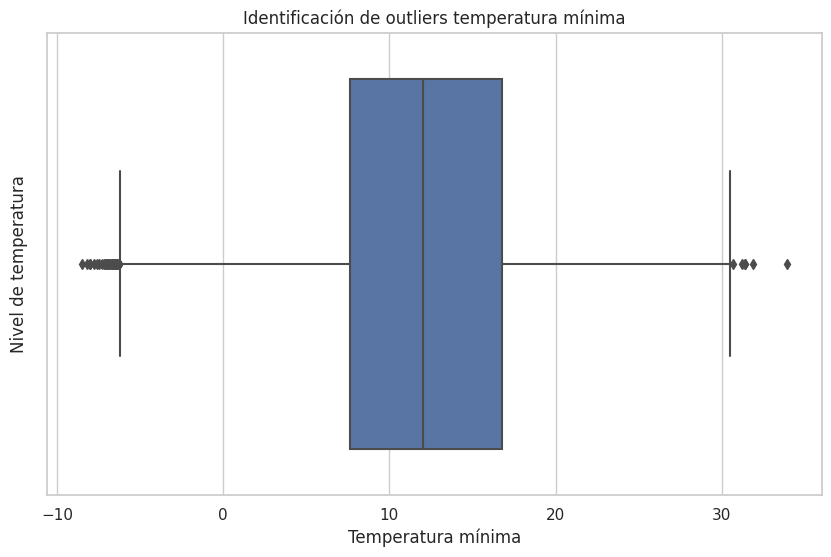

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta4, x='MinTemp')
plt.xlabel('Temperatura mínima')
plt.ylabel('Nivel de temperatura')
plt.title('Identificación de outliers temperatura mínima')
plt.show()

#### Análisis exploratorio de datos

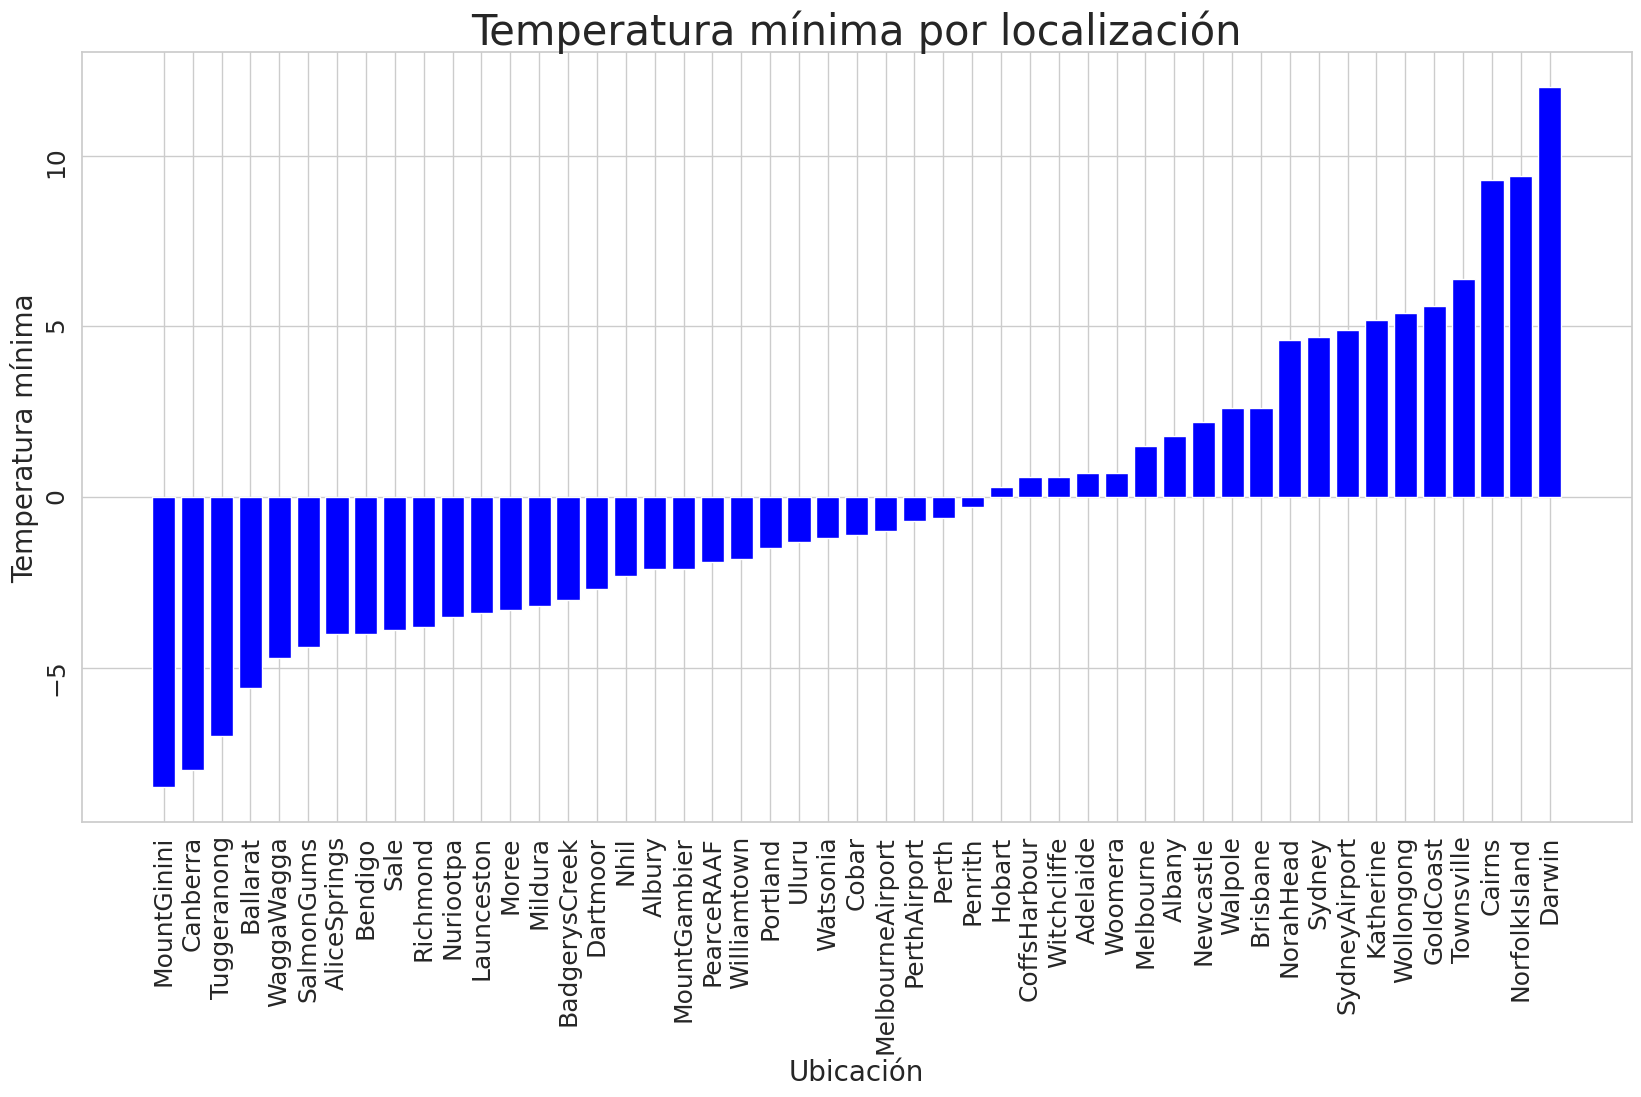

In [50]:
agrupacion4 = pregunta4[['Location', 'MinTemp']].groupby('Location').min().sort_values(by='MinTemp', ascending=True)
agrupacion4= agrupacion4.reset_index()

ejex = agrupacion4.Location
ejey = agrupacion4.MinTemp

plt.figure(figsize=(20, 10))
plt.bar(ejex, ejey, color='blue')
plt.xlabel("Ubicación",size=20)
plt.xticks(rotation=90,size=18)
plt.ylabel("Temperatura mínima",size=20)
plt.yticks(rotation=90,size=18)
plt.title("Temperatura mínima por localización",size=30)
plt.show()

#### Contestación de la pregunta

Las ciudades con las temperaturas mínimas más bajas son MountGinini, Canberra, Tuggeranong y Ballarat con mínimas de -5 grados en adelante.

### Pregunta 5

¿Cuál es la temperatura promedio por ubicación?

In [51]:
pregunta5 = dfbase[['Location','Temp3pm','Temp9am']]
pregunta5

,Location,Temp3pm,Temp9am
0,Albury,21.8,16.9
1,Albury,24.3,17.2
2,Albury,29.7,17.8
3,Albury,28.9,20.6
4,Albury,25.5,16.3
...,...,...,...
99511,Uluru,20.0,11.6
99512,Uluru,20.9,9.4
99513,Uluru,22.4,10.1
99514,Uluru,24.5,10.9


In [52]:
pregunta5.isnull().sum()

Location       0
Temp3pm     1904
Temp9am      614
dtype: int64

Ambas variables poseen valores nulos.


#### Limpieza y transformación de datos

##### Tratamiento columna Temp9am

In [53]:
pregunta5.Temp9am.unique()

array([16.9, 17.2, 17.8, 20.6, 16.3, 20.1, 20.4, 15.9, 15.8, 17.3, 18. ,
       15.5, 24.5, 23.8, 20.9, 21.5, 26.6, 24.6, 21.6, 12.5, 14.9, 17.1,
       20.7, 25.2, 17.9, 20.2, 24.2, 24.3, 27.6, 26.8, 22.8, 23.3, 21.2,
       23.4, 29. , 29.9, 32.4, 28.8, 25.5, 28.7, 29.6, 34.5, 17.4, 16.7,
       18.3, 21.4, 22.1, 21. , 19.3, 18.7, 20. , 23. , 13.9, 12.6, 13.3,
       17.6, 18.6, 22.2, 19. , 19.9, 12.2, 12.1, 14.7, 18.8, 18.1, 16.2,
       16.5, 14. , 16. , 16.6, 12.9, 13.8, 15.1, 16.4, 16.1,  9.6, 14.1,
        9.5,  7.6, 10.1,  8.2,  7.9, 10.6, 10.3, 10. , 11. ,  9.4, 11.7,
        8.5,  9.1,  7.5,  7. ,  8.8, 12.4, 11.9, 13.6,  7.1, 10.2, 11.3,
        4.7,  6.8,  4.9,  2.2,  1.9,  5.9,  6.5,  5.4,  6.6,  5.6,  8.3,
        9.8, 13.5,  7.8,  2.3,  4.8,  9. ,  4.5,  3.2,  3.7,  2.5,  4.4,
        4.2,  9.3, 11.6,  8.9, 10.5,  9.9,  5.7,  8. ,  2. , 14.8,  5.5,
       11.1,  5.8, 10.8,  7.7,  6.9,  7.2,  6.7,  8.6,  8.7, 10.9,  8.1,
       11.2, 13.1, 13.4, 15.4, 15.6, 19.1, 23.1, 23

Confirmamos que los nulos no corresponden a 0.

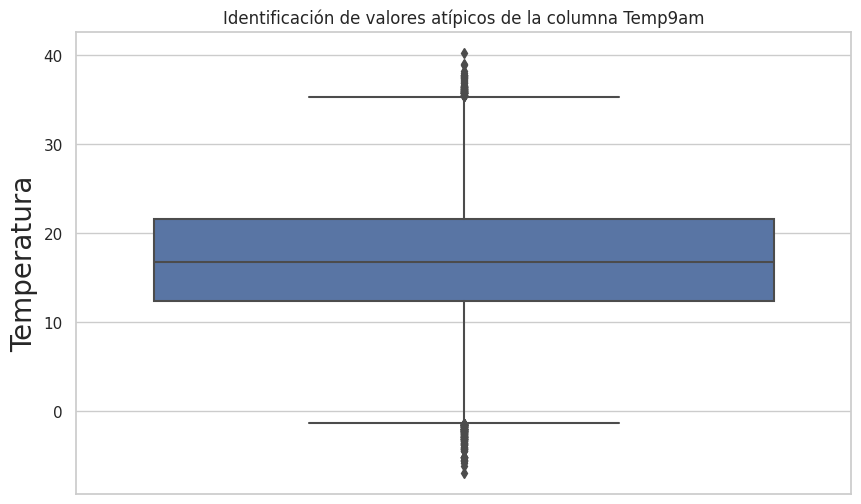

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta5, y='Temp9am')
plt.title(r'Identificación de valores atípicos de la columna Temp9am')
plt.ylabel('Temperatura',size=20)
plt.show()

Se observan valores atipicos. Se reemplazan los valores nulos por la mediana.

In [55]:
mediana = pregunta5['Temp9am'].median()
pregunta5['Temp9am'].fillna(mediana, inplace=True)
pregunta5.Temp9am.isnull().sum()

0

Sin nulls, pasamos a tratar la siguiente columna.

##### Tratamiento columna Temp3pm

In [56]:
pregunta5.Temp3pm.unique()

array([21.8, 24.3, 29.7, 28.9, 25.5, 28.2, 28.8, 17. , 19.8, 26.2, 18.1,
       21.5, 21. , 23.2, 31.6, 30.8, 29. , 31.2, 32.1, 26.1, 18.2, 22.1,
       26.5, 33.9, 38.4, 27.6, 26.6, 29.3, 33.2, 35.7, 27.1, 30.5, 37.7,
       33. , 36.5, 40.1, 42. , 41.9, 37.1, 35.2, 41.6, 43.4, 38.5, 25.8,
       24.9, 28.5, 29.5, 30.7, 32.7, 26.8, 29.8, 31.3, 33.4, 28.6, 28.1,
       29.2, 21.4, 22. , 27. , 29.6, 18.8, 23.8, 19.7, 20.5, 23.9, 27.2,
       33.5, 31.4, 19.6, 27.7, 29.9, 27.4, 21.2, 20.9, 21.6, 23.5, 25. ,
       24.4, 24.6, 19.4, 23.6, 21.3, 22.6, 15.1, 14.5, 11.6,  9.4, 14. ,
       12.1, 16.1, 19.1, 18.5, 18.4, 19.2, 20.2, 17.7, 18. , 14.6, 15.9,
       14.7, 18.7, 21.7, 17.4, 15.6, 15.3, 16.7, 13.4, 16.5, 10.2, 11.5,
       11.4,  7.9,  9.7,  8.8, 15.5, 13.9, 15.4, 14.9, 16.4, 13.6, 15.2,
       13.7, 11.3, 12.3, 13.1, 11.7, 12.6, 10.1, 14.2, 11.2, 13.5, 17.6,
       12.9, 10.8,  9.6,  7.3, 12.7, 13.3, 16.6, 13. , 11.1, 14.3, 12.8,
       17.3, 16.2, 10.7, 16. , 23.1, 17.1, 20.7, 20

Descartamos la posibilidad de que los nulos correspondan al valor 0.

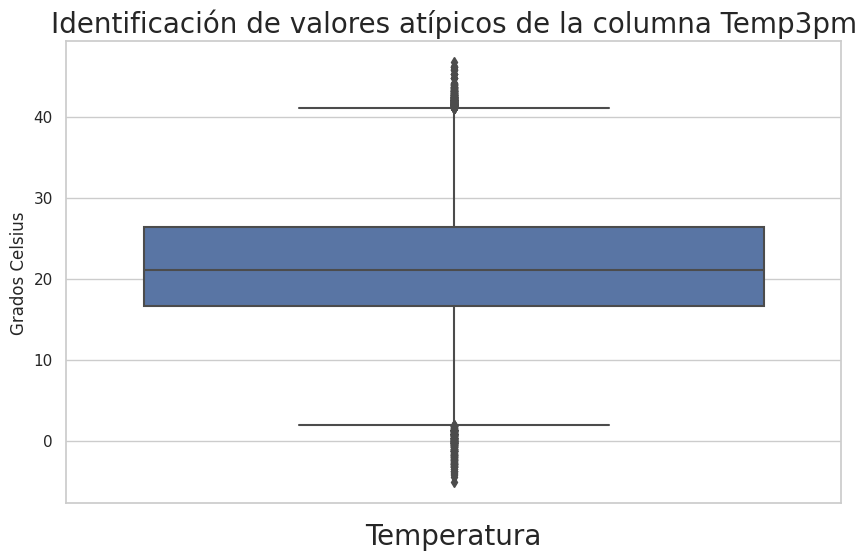

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pregunta5, y='Temp3pm')
plt.title(r'Identificación de valores atípicos de la columna Temp3pm', size=20)
plt.xlabel('Temperatura',size=20)
plt.ylabel('Grados Celsius')
plt.show()

Se observan a los extremos valores atípicos. Se reemplazan los valores nulos por la mediana.

In [58]:
mediana = pregunta5['Temp3pm'].median()
pregunta5['Temp3pm'].fillna(mediana, inplace=True)
pregunta5.Temp3pm.isnull().sum()

0

Ya sin nulos, pasamos al análisis exploratorio de datos.

##### Creación de columna adicional

###### Columna "TemperaturaProm"

In [59]:
pregunta5['TemperaturaProm'] = (pregunta5['Temp9am'] + pregunta5['Temp3pm']) / 2
pregunta5

,Location,Temp3pm,Temp9am,TemperaturaProm
0,Albury,21.8,16.9,19.35
1,Albury,24.3,17.2,20.75
2,Albury,29.7,17.8,23.75
3,Albury,28.9,20.6,24.75
4,Albury,25.5,16.3,20.90
...,...,...,...,...
99511,Uluru,20.0,11.6,15.80
99512,Uluru,20.9,9.4,15.15
99513,Uluru,22.4,10.1,16.25
99514,Uluru,24.5,10.9,17.70


In [60]:
promedios_ciudad = pregunta5.groupby('Location')['TemperaturaProm'].mean().reset_index()
promedios_ciudad = promedios_ciudad.sort_values(by='TemperaturaProm', ascending=False)


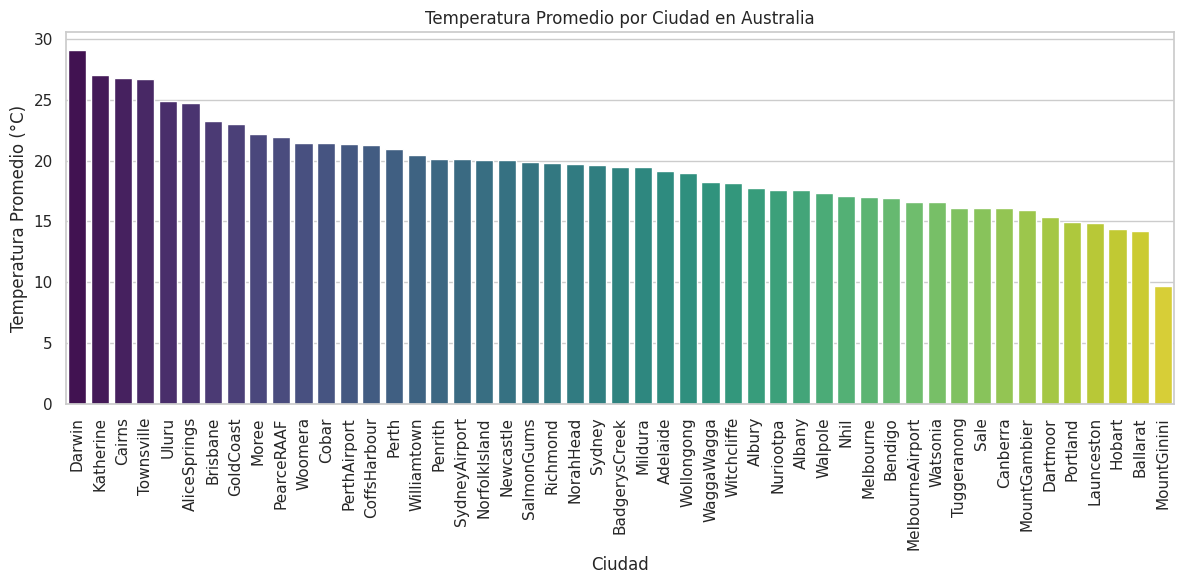

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='TemperaturaProm', data=promedios_ciudad, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Ciudad')
plt.ylabel('Temperatura Promedio (°C)')
plt.title('Temperatura Promedio por Ciudad en Australia')
plt.tight_layout()
plt.show()


#### Análisis exploratorio de datos

#### Contestación de la pregunta

 Las ciudades tropicales del norte (Darwin, Katherine, Cairns, Townsville) son las más cálidas, y a medida que se avanza hacia el sur o hacia el interior más árido (como Uluru), las temperaturas promedio anuales tienden a disminuir

# Preparación de los Datos

## Limpieza y transformación de datos

In [62]:
dftraining = pd.read_csv('/kaggle/input/australia-weather-data/Weather Training Data.csv')
dftest = pd.read_csv('/kaggle/input/australia-weather-data/Weather Test Data.csv')

### Datos de entrenamiento


In [63]:
dftraining.head(6)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0


In [64]:
dftraining.shape

(99516, 23)

Borrado columna innecesaria

In [65]:
dftraining.drop(['row ID'],axis=1, inplace=True)

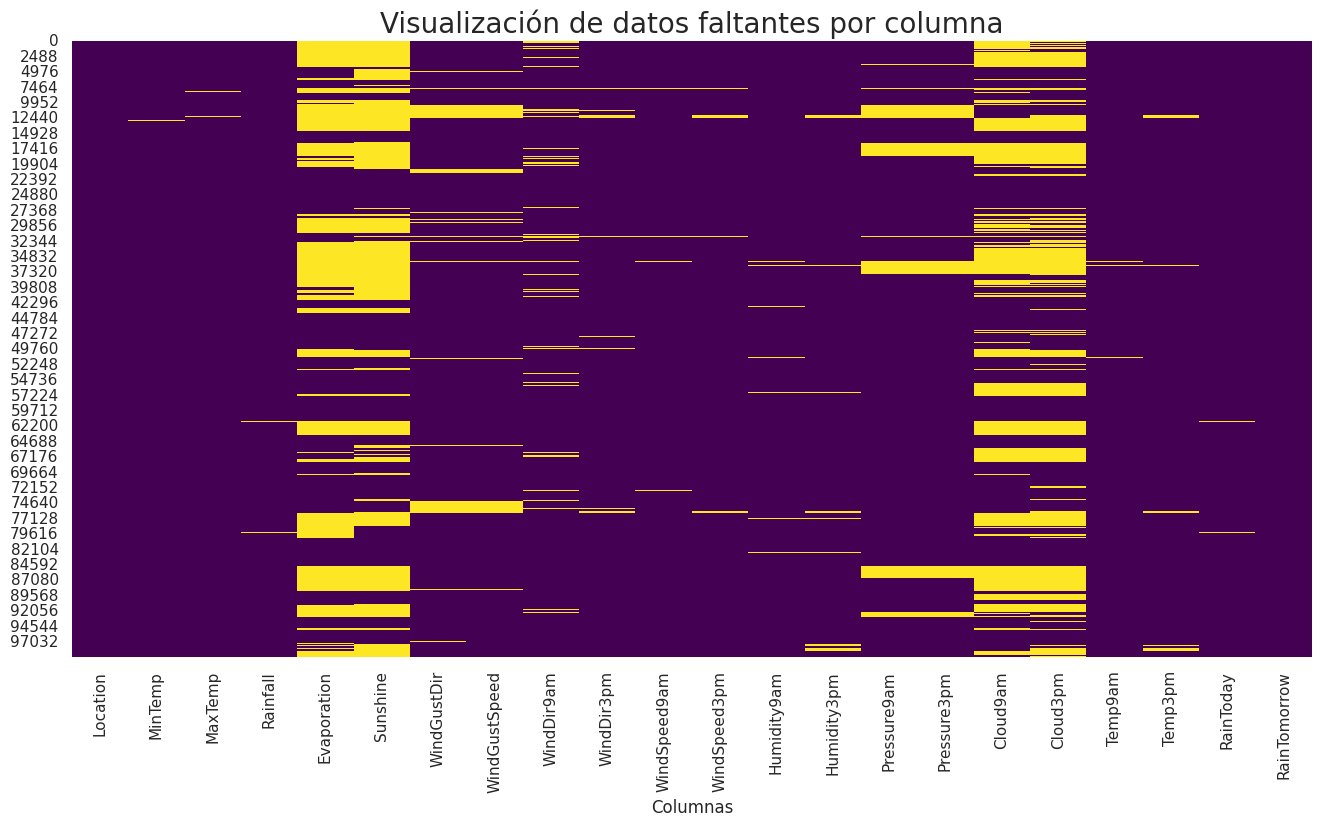

In [66]:
plt.figure(figsize=(16, 8))
sns.heatmap(dftraining.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de datos faltantes por columna', fontsize=20, )
plt.xlabel('Columnas')
plt.show()

In [67]:
dftraining.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [68]:
dftraining.describe(include='object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,99516,92995,92510,96868,98537
unique,49,16,16,16,2
top,Canberra,W,N,SE,No
freq,2393,6843,8052,7410,76481


### Datos de prueba

In [69]:
dftest.head(6)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes
5,Row6,Albury,11.5,29.3,0.0,NaN,NaN,S,24.0,SE,SE,9.0,9.0,56.0,28.0,1019.3,1014.8,NaN,NaN,19.1,27.3,No


In [70]:
dftest.shape

(42677, 22)

Borrado de columna innecesaria

In [71]:
dftest.drop(['row ID'],axis=1, inplace=True)

In [72]:
dftest.isnull().sum() 

Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64

In [73]:
dftest.describe(include='object')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
count,42677,39868,39670,41547,42250
unique,49,16,16,16,2
top,Canberra,W,N,SE,No
freq,1025,2937,3341,3253,32851


In [74]:
dftraining.isnull().mean() * 100

Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [75]:
def columna_categorica(df):
    """
    Esta función recibe un DataFrame y devuelve una lista de las columnas categóricas.
    """
    return df.select_dtypes(include=['object']).columns

def columna_numerica(df):
    
    if 'RainTomorrow' in df.select_dtypes(include=['float64', 'int64']).columns:
        return df.select_dtypes(include=['float64', 'int64']).columns.drop('RainTomorrow')
    else:
        return df.select_dtypes(include=['float64', 'int64']).columns

In [76]:
col_cat = columna_categorica(dftraining)
col_num = columna_numerica(dftraining)

### Tratamiento de outliers

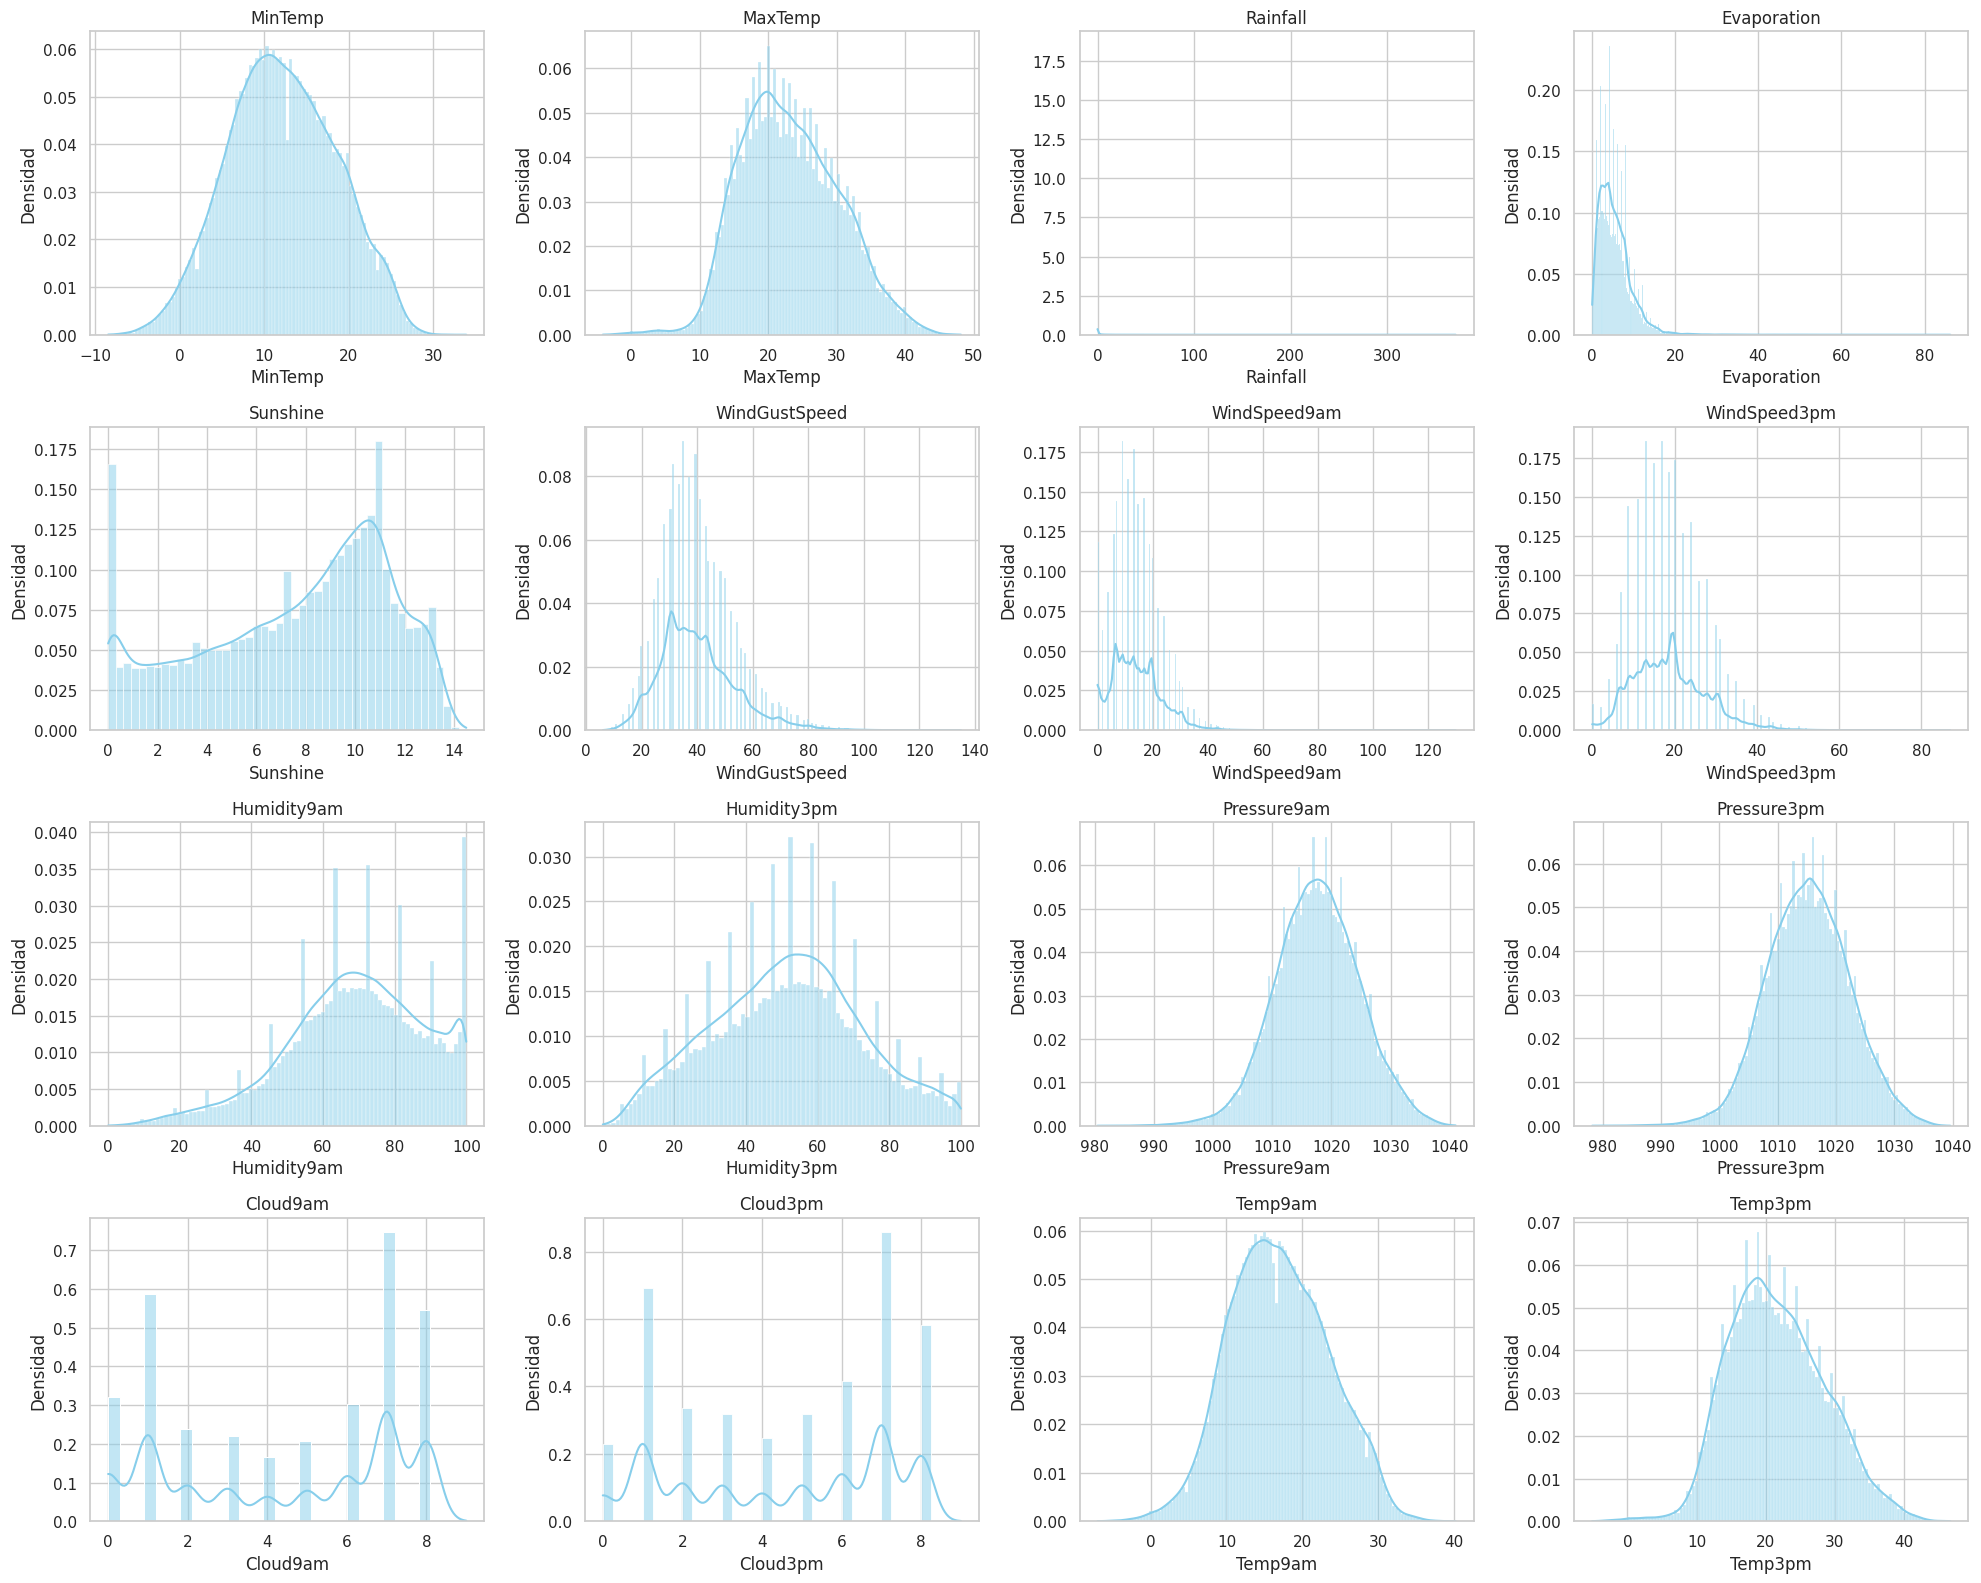

In [77]:
import seaborn as sns

import matplotlib.pyplot as plt

num_cols = col_num.drop('RainTomorrow') if 'RainTomorrow' in col_num else col_num
n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for idx, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.histplot(dftraining[col].dropna(), kde=True, stat="density", color='skyblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

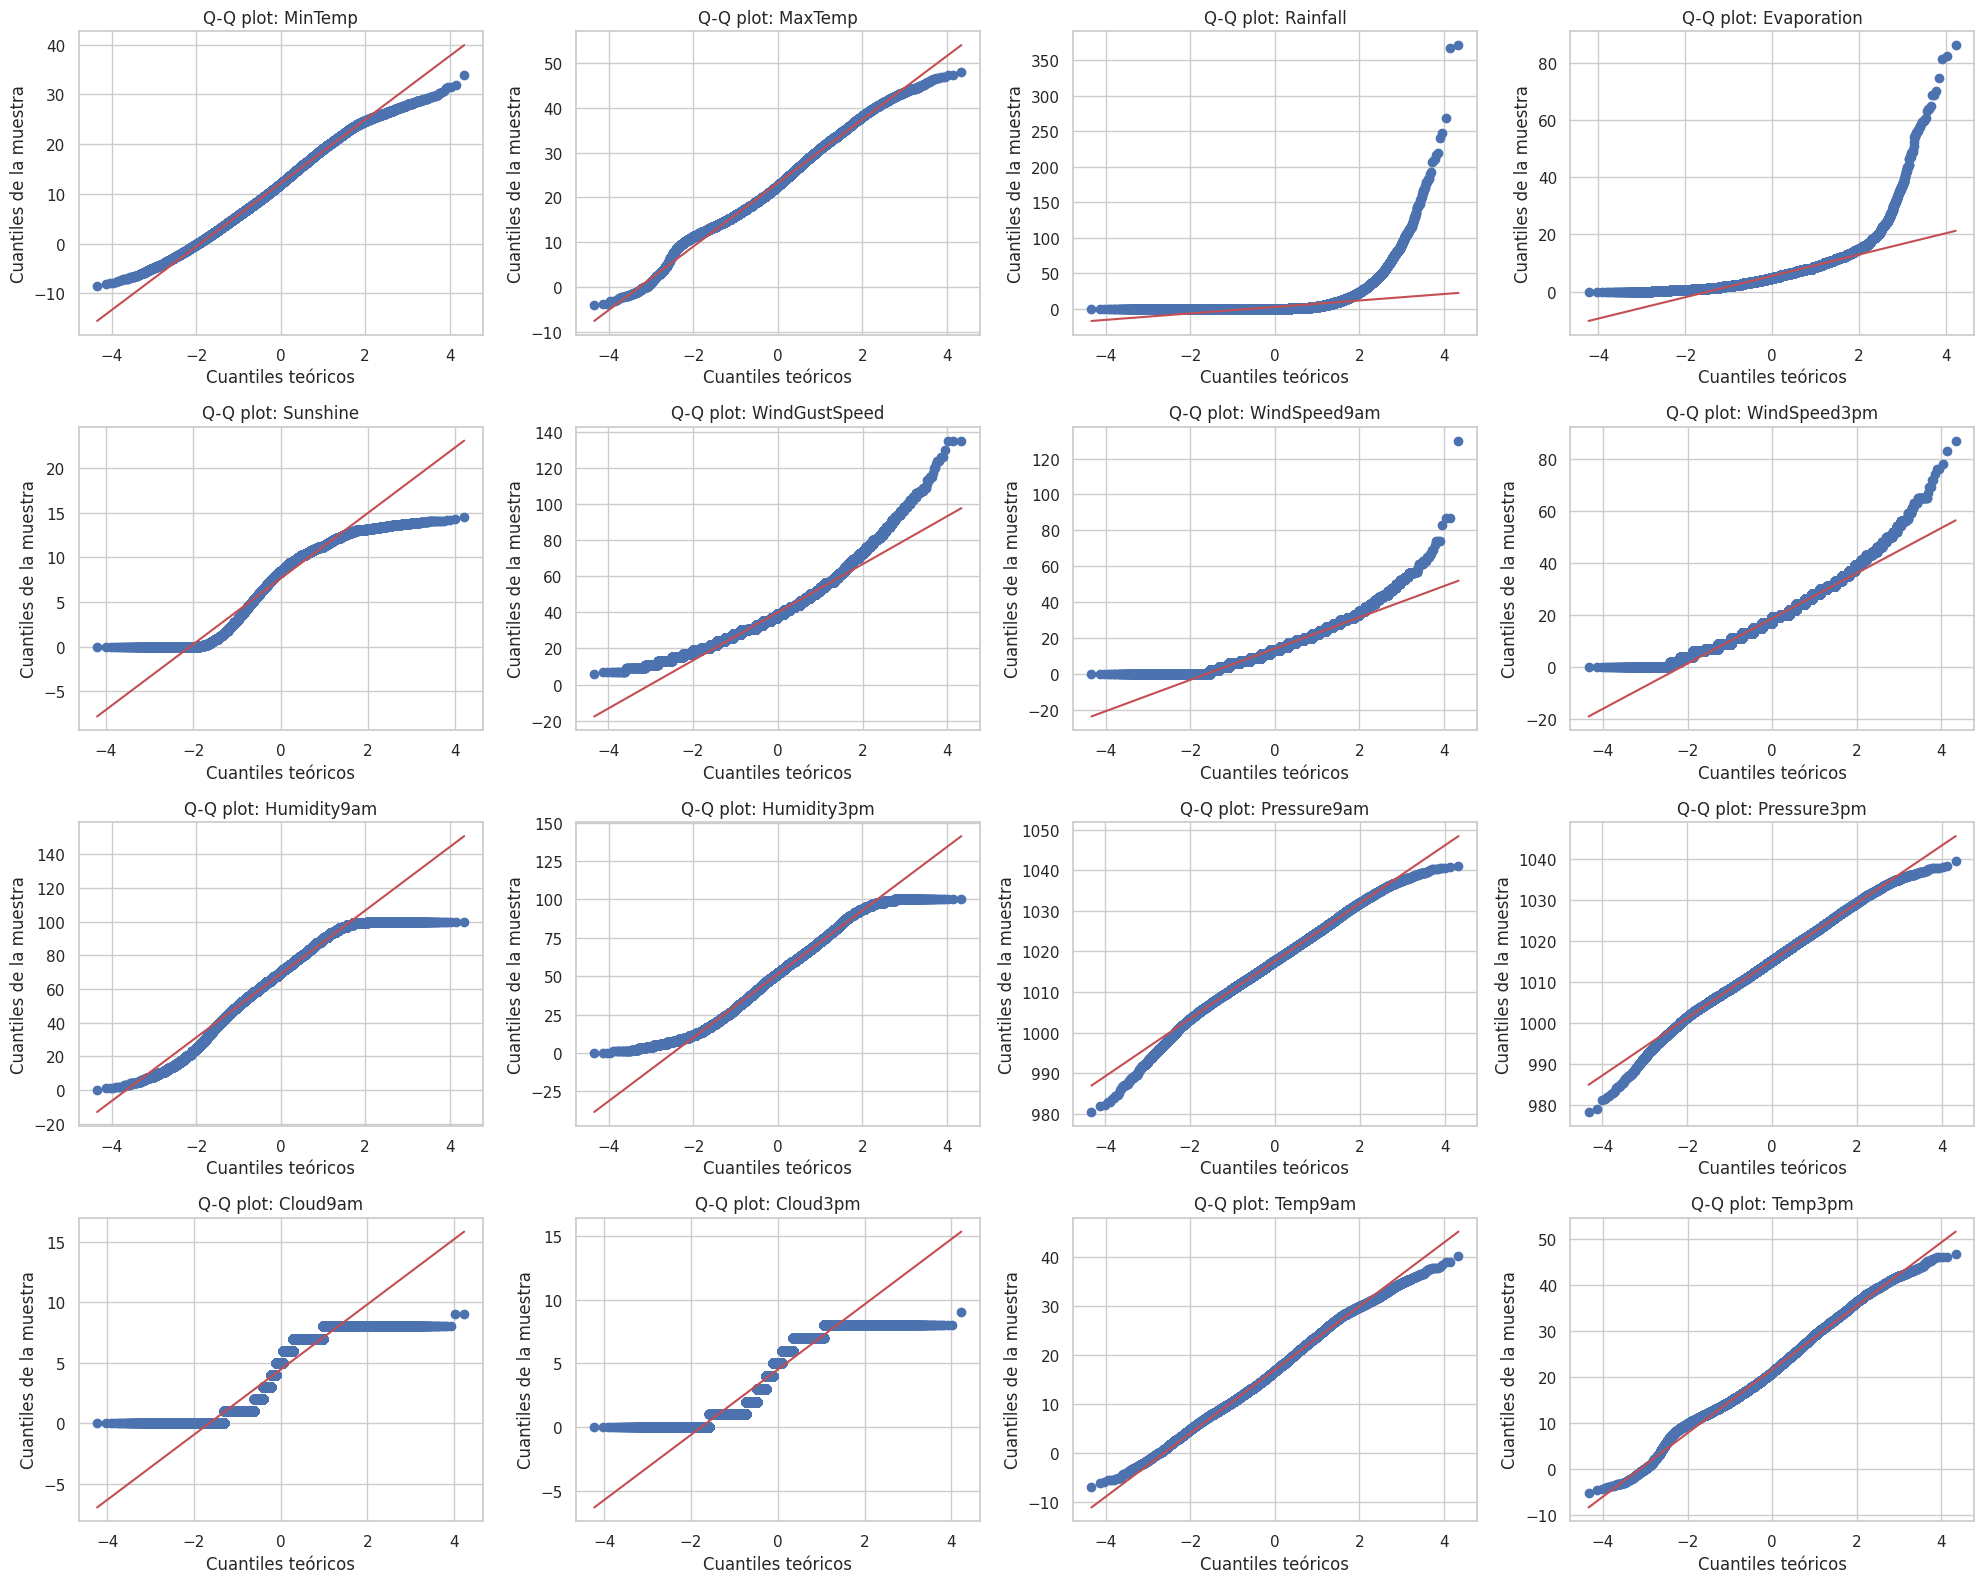

In [78]:
import scipy.stats as stats

sns.set_theme(style="whitegrid")
n_cols = 4
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for idx, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    stats.probplot(dftraining[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot: {col}')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de la muestra')
plt.tight_layout()
plt.show()

- Las variables relacionadas con la lluvia, el viento y la evaporación están fuertemente sesgadas. 
- Será necesario normalizar estas distribuciones para mejorar el rendimiento de los modelos.

In [79]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)


    for y in data_1:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for col in dftraining.select_dtypes(include=['float64','int64']).columns:
    print(col + ": " + str(len(detect_outlier(dftraining[col]))))

MinTemp: 19
MaxTemp: 215
Rainfall: 1658
Evaporation: 637
Sunshine: 0
WindGustSpeed: 914
WindSpeed9am: 905
WindSpeed3pm: 644
Humidity9am: 311
Humidity3pm: 0
Pressure9am: 347
Pressure3pm: 284
Cloud9am: 0
Cloud3pm: 0
Temp9am: 96
Temp3pm: 262
RainTomorrow: 0


Transformación logarítmica (log1p) aplicada a las siguientes columnas:
['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']


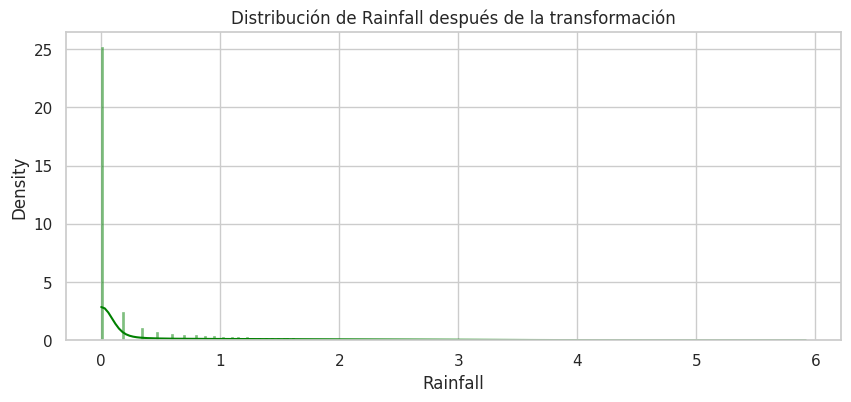

In [80]:
# Columnas a las que se aplicará la transformación logarítmica
cols_to_transform = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

# Bucle para aplicar la transformación a cada columna en ambos DataFrames
for col in cols_to_transform:
    # Se usa np.log1p para manejar correctamente los valores iguales a 0
    dftraining[col] = np.log1p(dftraining[col])
    dftest[col] = np.log1p(dftest[col])

print("Transformación logarítmica (log1p) aplicada a las siguientes columnas:")
print(cols_to_transform)

# Opcional: Visualiza una de las columnas transformadas para ver el cambio
plt.figure(figsize=(10, 4))
sns.histplot(dftraining['Rainfall'], kde=True, stat="density", color='green')
plt.title('Distribución de Rainfall después de la transformación')
plt.show()

### Imputación de valores nulos

#### imputacion de valores nulos en datos de entrenamiento

In [81]:
def verificar_columnas_iguales(df1, df2, columnas, tipo="numéricas"):
    if list(df1[columnas].columns) != list(df2[columnas].columns):
        raise ValueError(f"Las columnas {tipo} no coinciden entre los conjuntos.")

In [82]:
verificar_columnas_iguales(dftraining, dftest, col_num, tipo="numéricas")
verificar_columnas_iguales(dftraining, dftest, col_cat, tipo="categóricas")

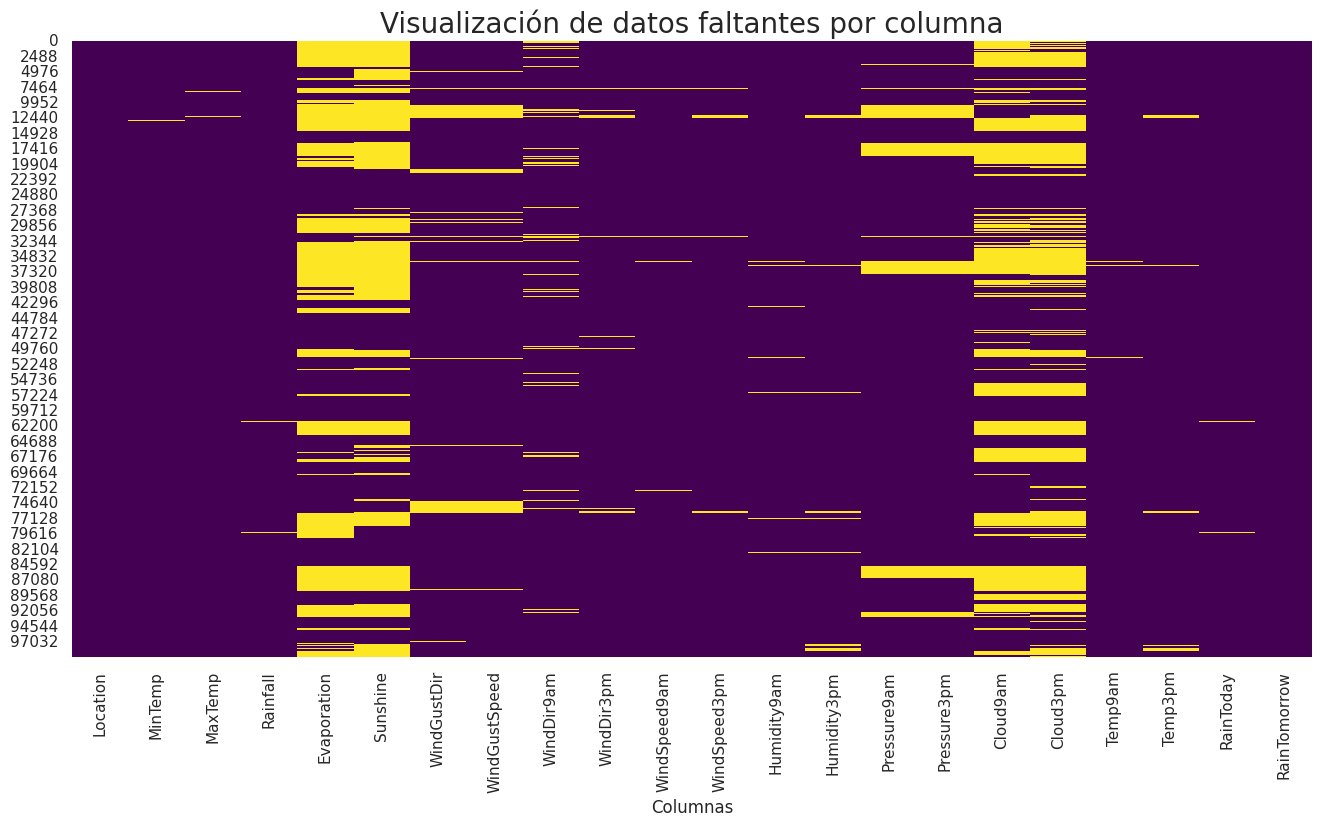

In [83]:
plt.figure(figsize=(16, 8))
sns.heatmap(dftraining.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de datos faltantes por columna', fontsize=20, )
plt.xlabel('Columnas')
plt.show()

In [84]:
dftraining.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [85]:
dftraining["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [86]:
# Checando si puedo reemplazar RainToday por 0 y 1 como consecuencia del valor de rainfall como una inferencia de lluvia
dftraining[["RainToday", "Rainfall"]]

,RainToday,Rainfall
0,No,0.470004
1,No,0.000000
2,No,0.693147
3,No,0.182322
4,No,0.000000
...,...,...
99511,No,0.000000
99512,No,0.000000
99513,No,0.000000
99514,No,0.000000


In [87]:
# Los valores nulos son pocos (menos del 5%), imputar con el valor más frecuente de "RainToday" ("Sí" o "No")
dftraining["RainToday"].isnull().mean()*100

0.9837614052011736

In [88]:
from sklearn.impute import SimpleImputer

def ajustar_imputador(df, columns, strategy):
    """
    Crea un imputador, lo ajusta con los datos proporcionados (entrenamiento) y lo devuelve.
    """
    imputer = SimpleImputer(strategy=strategy)
    imputer.fit(df[columns])
    return imputer

def aplicar_imputacion(df, columns, imputer):
    """
    Aplica una transformación de imputación a un dataframe usando un imputer ya ajustado.
    """
    df[columns] = imputer.transform(df[columns])
    return df

In [89]:
# Ajustar imputadores para los datos de entrenamiento
ajuste_training_num = ajustar_imputador(dftraining, col_num, strategy='mean')
ajuste_training_cat = ajustar_imputador(dftraining, col_cat, strategy='most_frequent')

In [90]:
# Imputación en datos de entrenamiento
aplicar_imputacion(dftraining, col_num, ajuste_training_num)
aplicar_imputacion(dftraining, col_cat, ajuste_training_cat)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.470004,1.693078,7.61509,W,3.806662,W,WNW,3.044522,3.218876,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,0
1,Albury,7.4,25.1,0.000000,1.693078,7.61509,WNW,3.806662,NNW,WSW,1.609438,3.135494,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
2,Albury,17.5,32.3,0.693147,1.693078,7.61509,W,3.737670,ENE,NW,2.079442,3.044522,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
3,Albury,14.6,29.7,0.182322,1.693078,7.61509,WNW,4.043051,W,W,2.995732,3.218876,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Albury,7.7,26.7,0.000000,1.693078,7.61509,W,3.583519,SSE,W,1.945910,2.890372,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,0.000000,1.693078,7.61509,ESE,3.737670,SE,E,2.995732,3.295837,56.0,32.0,1028.1,1024.3,4.447985,7.000000,11.6,20.0,No,0
99512,Uluru,3.5,21.8,0.000000,1.693078,7.61509,E,3.465736,ESE,E,2.772589,2.639057,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9,No,0
99513,Uluru,2.8,23.4,0.000000,1.693078,7.61509,E,3.465736,SE,ENE,2.639057,2.484907,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4,No,0
99514,Uluru,3.6,25.3,0.000000,1.693078,7.61509,NNW,3.135494,SE,N,2.639057,2.302585,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5,No,0


In [91]:
dftraining.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [92]:
dftraining["RainTomorrow"].unique()

array([0, 1])

In [93]:
dftraining

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.470004,1.693078,7.61509,W,3.806662,W,WNW,3.044522,3.218876,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,No,0
1,Albury,7.4,25.1,0.000000,1.693078,7.61509,WNW,3.806662,NNW,WSW,1.609438,3.135494,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,No,0
2,Albury,17.5,32.3,0.693147,1.693078,7.61509,W,3.737670,ENE,NW,2.079442,3.044522,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0
3,Albury,14.6,29.7,0.182322,1.693078,7.61509,WNW,4.043051,W,W,2.995732,3.218876,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,No,0
4,Albury,7.7,26.7,0.000000,1.693078,7.61509,W,3.583519,SSE,W,1.945910,2.890372,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,0.000000,1.693078,7.61509,ESE,3.737670,SE,E,2.995732,3.295837,56.0,32.0,1028.1,1024.3,4.447985,7.000000,11.6,20.0,No,0
99512,Uluru,3.5,21.8,0.000000,1.693078,7.61509,E,3.465736,ESE,E,2.772589,2.639057,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9,No,0
99513,Uluru,2.8,23.4,0.000000,1.693078,7.61509,E,3.465736,SE,ENE,2.639057,2.484907,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4,No,0
99514,Uluru,3.6,25.3,0.000000,1.693078,7.61509,NNW,3.135494,SE,N,2.639057,2.302585,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5,No,0


#### Imputación de valores nulos en datos de prueba

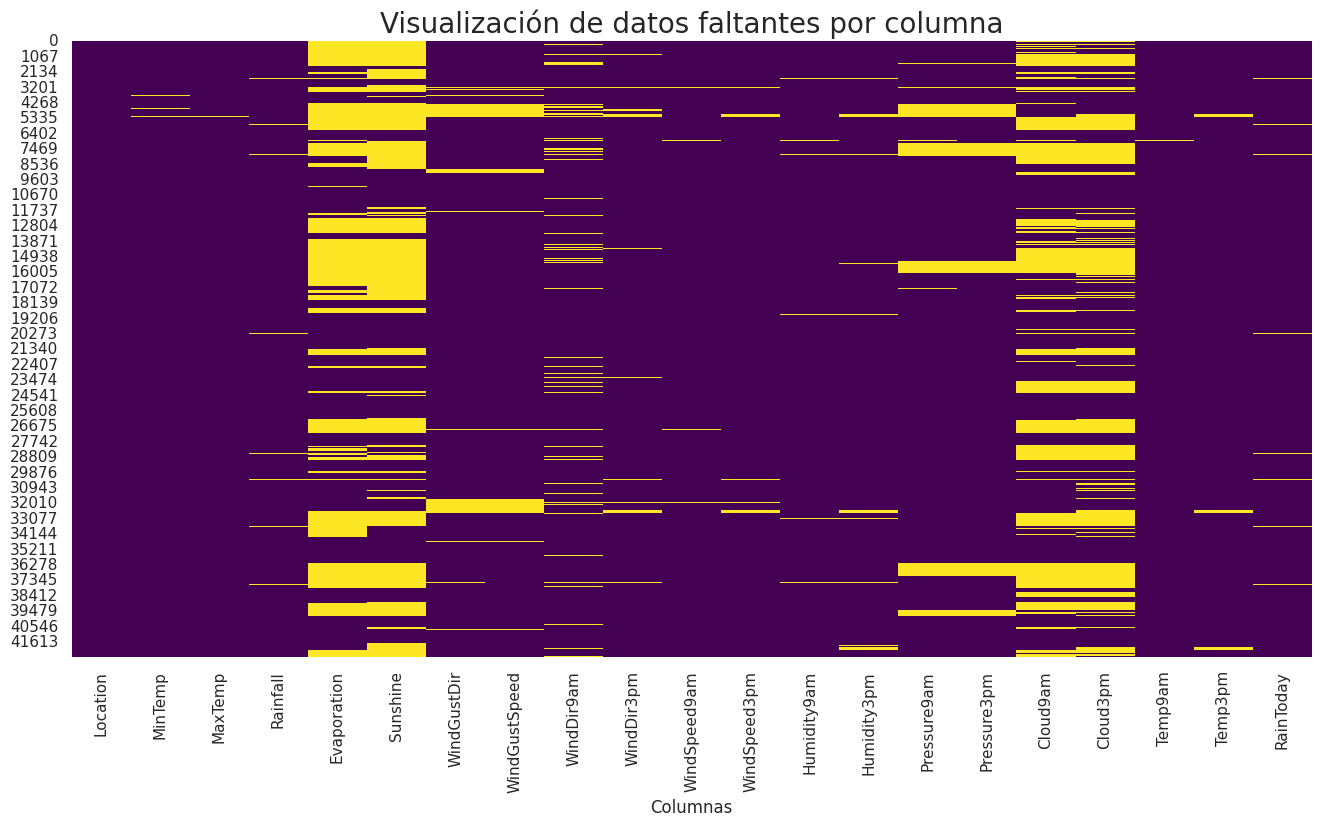

In [94]:
plt.figure(figsize=(16, 8))
sns.heatmap(dftest.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de datos faltantes por columna', fontsize=20, )
plt.xlabel('Columnas')
plt.show()

In [95]:
columna_categorica(dftest)
columna_numerica(dftest)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [96]:
dftest.isnull().sum()

Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64

In [97]:
# imputando los valores nulos en dftest con los valores de entrenamiento
# Una vez que los parámetros de la transformación (medios, desviaciones 
# estándar, categorías únicas, etc.) han sido aprendidos del conjunto de
#  entrenamiento, entonces esos mismos parámetros aprendidos se aplican para 
# transformar tanto el conjunto de entrenamiento como el conjunto de prueba.

# Imputación en datos de prueba
aplicar_imputacion(dftest, col_cat, ajuste_training_cat)
aplicar_imputacion(dftest, col_num, ajuste_training_num)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.000000,1.693078,7.61509,WSW,3.850148,W,WSW,2.995732,3.295837,38.0,30.0,1007.6,1008.7,4.447985,2.000000,21.0,23.2,No
1,Albury,9.2,28.0,0.000000,1.693078,7.61509,NE,3.218876,SE,E,2.484907,2.302585,45.0,16.0,1017.6,1012.8,4.447985,4.519122,18.1,26.5,No
2,Albury,14.3,25.0,0.000000,1.693078,7.61509,W,3.931826,SW,W,3.044522,3.218876,49.0,19.0,1009.6,1008.2,1.000000,4.519122,18.1,24.6,No
3,Albury,9.7,31.9,0.000000,1.693078,7.61509,NNW,4.394449,SE,NW,2.079442,3.367296,42.0,9.0,1008.9,1003.6,4.447985,4.519122,18.3,30.2,No
4,Albury,15.9,18.6,2.809403,1.693078,7.61509,W,4.127134,NNW,NNW,3.367296,3.367296,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,Uluru,2.4,19.1,0.000000,1.693078,7.61509,E,3.526361,SE,E,2.890372,2.890372,59.0,24.0,1030.0,1026.2,4.447985,4.519122,8.0,18.8,No
42673,Uluru,2.3,21.4,0.000000,1.693078,7.61509,SE,3.135494,SE,SSE,2.484907,2.079442,60.0,28.0,1026.9,1022.8,4.447985,4.519122,8.9,20.3,No
42674,Uluru,2.6,22.5,0.000000,1.693078,7.61509,S,2.995732,S,E,2.302585,2.079442,59.0,24.0,1025.0,1021.4,4.447985,4.519122,8.8,22.1,No
42675,Uluru,7.4,20.6,0.000000,1.693078,7.61509,E,3.583519,ESE,E,2.772589,2.890372,63.0,33.0,1027.2,1023.3,4.447985,4.519122,11.0,20.3,No


In [98]:
dftest.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### Normalización de datos

In [99]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# La variable col_num ya contiene las columnas numéricas que necesitamos
# Ajustar el scaler SÓLO con los datos de entrenamiento y luego transformar
dftraining[col_num] = scaler.fit_transform(dftraining[col_num])

# Aplicar la MISMA transformación (ya ajustada) a los datos de prueba
dftest[col_num] = scaler.transform(dftest[col_num])

print("Estandarización (StandardScaler) aplicada a las columnas numéricas.")

# Muestra cómo se ven los datos numéricos de entrenamiento después de escalar
dftraining[col_num].head()

Estandarización (StandardScaler) aplicada a las columnas numéricas.


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.191910,-0.044818,-0.018282,0.0,0.0,0.458782,0.702417,0.669382,0.112555,-1.434774,-1.478566,-1.223345,1.559701,0.000000,-0.010827,0.017285
1,-0.749029,0.264744,-0.540389,0.0,0.0,0.458782,-1.011957,0.515004,-1.311772,-1.288534,-1.049122,-1.118737,0.000000,0.000000,0.035548,0.381450
2,0.834885,1.277857,0.229599,0.0,0.0,0.244635,-0.450483,0.346572,0.692836,-0.898561,-1.019505,-1.387729,1.120598,1.656917,0.128300,1.168047
3,0.380098,0.912011,-0.337856,0.0,0.0,1.192507,0.644132,0.669382,-0.731491,-1.386028,-1.256440,-1.477393,0.000000,0.000000,0.561142,1.051514
4,-0.701982,0.489880,-0.540389,0.0,0.0,-0.233832,-0.610002,0.061167,-1.100761,-1.581014,-0.634487,-0.775026,0.000000,0.000000,-0.103579,0.556249


### Codificación de Etiquetas 

#### Codificación de Etiquetas en datos de entrenamiento

In [100]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
raintomorrow = le.fit_transform(dftraining["RainTomorrow"])

In [101]:
from sklearn.preprocessing import OneHotEncoder
# 1. Inicializar el codificador
# handle_unknown='ignore' asegura que si en los datos de prueba aparece una categoría
# que no estaba en el entrenamiento, no dará error, simplemente la ignorará.
# sparse_output=False devuelve un array de numpy en lugar de una matriz dispersa.
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 2. Separar la variable objetivo 'RainTomorrow' antes de la codificación
# Esto es importante para no codificarla junto con las características.
y_train_labels = dftraining['RainTomorrow'].copy()
X_train = dftraining.drop('RainTomorrow', axis=1)

# La variable de prueba no tiene 'RainTomorrow', así que la usamos tal cual.
X_test = dftest.copy()

# 3. Ajustar el codificador SÓLO con las columnas categóricas de los datos de entrenamiento
print("Ajustando OneHotEncoder con los datos de entrenamiento...")
ohe.fit(X_train[col_cat])
print("Ajuste completado.")

Ajustando OneHotEncoder con los datos de entrenamiento...
Ajuste completado.


In [102]:
# 4. Transformar las columnas categóricas en ambos dataframes
encoded_cols_train = ohe.transform(X_train[col_cat])
encoded_cols_test = ohe.transform(X_test[col_cat])

# 5. Crear DataFrames con las nuevas columnas codificadas
# Usamos get_feature_names_out() para obtener los nombres de las nuevas columnas
encoded_df_train = pd.DataFrame(encoded_cols_train, index=X_train.index, columns=ohe.get_feature_names_out(col_cat))
encoded_df_test = pd.DataFrame(encoded_cols_test, index=X_test.index, columns=ohe.get_feature_names_out(col_cat))

# 6. Eliminar las columnas categóricas originales
X_train_num = X_train.drop(columns=col_cat)
X_test_num = X_test.drop(columns=col_cat)

# 7. Unir las columnas numéricas con las nuevas columnas codificadas
dftraining_encoded = pd.concat([X_train_num, encoded_df_train], axis=1)
dftest_encoded = pd.concat([X_test_num, encoded_df_test], axis=1)

# 8. Finalmente, reinsertamos la variable objetivo en el dataframe de entrenamiento
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dftraining_encoded['RainTomorrow'] = le.fit_transform(y_train_labels)


print("Forma del DataFrame de entrenamiento procesado:", dftraining_encoded.shape)
print("Forma del DataFrame de prueba procesado:", dftest_encoded.shape)


Forma del DataFrame de entrenamiento procesado: (99516, 116)
Forma del DataFrame de prueba procesado: (42677, 115)


In [103]:
dftraining_encoded.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,0.191910,-0.044818,-0.018282,0.0,0.0,0.458782,0.702417,0.669382,0.112555,-1.434774,-1.478566,-1.223345,1.559701,0.000000,-0.010827,0.017285,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.749029,0.264744,-0.540389,0.0,0.0,0.458782,-1.011957,0.515004,-1.311772,-1.288534,-1.049122,-1.118737,0.000000,0.000000,0.035548,0.381450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,0.834885,1.277857,0.229599,0.0,0.0,0.244635,-0.450483,0.346572,0.692836,-0.898561,-1.019505,-1.387729,1.120598,1.656917,0.128300,1.168047,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.380098,0.912011,-0.337856,0.0,0.0,1.192507,0.644132,0.669382,-0.731491,-1.386028,-1.256440,-1.477393,0.000000,0.000000,0.561142,1.051514,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,-0.701982,0.48988

# Modelado

Predecir si lloverá mañana en Australia.

#### Algoritmo NaiveBayes

In [104]:
#Definir las variables independientes y dependientes
from sklearn.feature_selection import SelectKBest


x_train = dftraining_encoded.drop(['RainTomorrow'], axis=1)
y_train = dftraining_encoded['RainTomorrow']

#Definir las mejores variables
best = SelectKBest(k=2)
best.fit_transform(x_train, y_train)
used_features = x_train.columns[best.get_support()]
print("Características seleccionadas:", used_features)

Características seleccionadas: Index(['Rainfall', 'Humidity3pm'], dtype='object')


In [105]:
# Filtrar los datos de entrenamiento para usar solo esas características
from sklearn.naive_bayes import GaussianNB

# Usar las características seleccionadas
x_train_selected = x_train[used_features]

# Entrenar el modelo
modelo = GaussianNB()
modelo.fit(x_train_selected, y_train)

# Preparar X de prueba (usando las mismas características seleccionadas)
x_test_selected = dftest_encoded[used_features]
# La variable 'y_test' debe venir del archivo de prueba si lo tiene, o ser usada para predecir
# Su archivo de prueba no parece tener 'RainTomorrow', por lo que solo puede hacer predicciones.

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(x_test_selected)

print("Predicciones para el conjunto de prueba:")
print(y_pred)

Predicciones para el conjunto de prueba:
[0 0 0 ... 0 0 0]


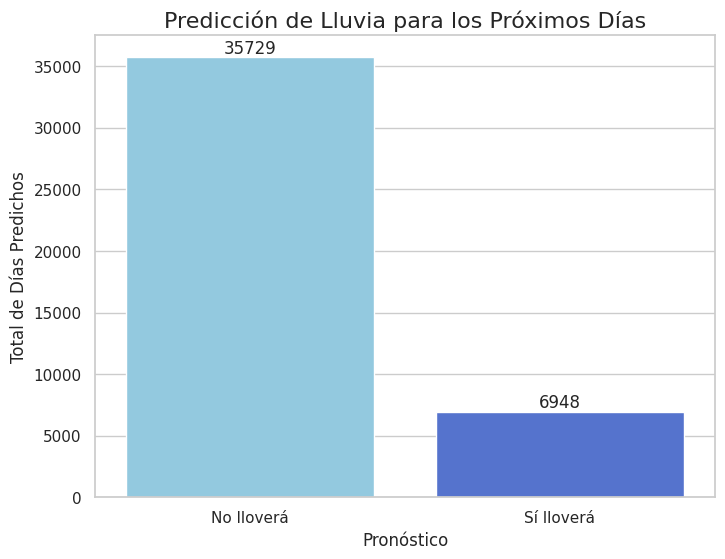

In [106]:
# Contar las predicciones
# El array y_pred ya existe de la celda anterior
counts = pd.Series(y_pred).value_counts()

# Mapear los valores a etiquetas legibles
labels = {0: 'No lloverá', 1: 'Sí lloverá'}
counts.index = counts.index.map(labels)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=['skyblue', 'royalblue'])

# Añadir título y etiquetas
plt.title('Predicción de Lluvia para los Próximos Días', fontsize=16)
plt.xlabel('Pronóstico', fontsize=12)
plt.ylabel('Total de Días Predichos', fontsize=12)

# Añadir el número exacto sobre cada barra para mayor claridad
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

Precisión del modelo: 0.6122
Asertividad (Accuracy) del modelo: 0.8098

Score del modelo en entrenamiento: 0.8132
Score del modelo en test: 0.8098

--- Reporte de Clasificación Naive Bayes ---
              precision    recall  f1-score   support

  No Lloverá       0.85      0.92      0.88     15402
  Sí Lloverá       0.61      0.43      0.51      4502

    accuracy                           0.81     19904
   macro avg       0.73      0.68      0.69     19904
weighted avg       0.79      0.81      0.80     19904


--- Matriz de Confusión ---


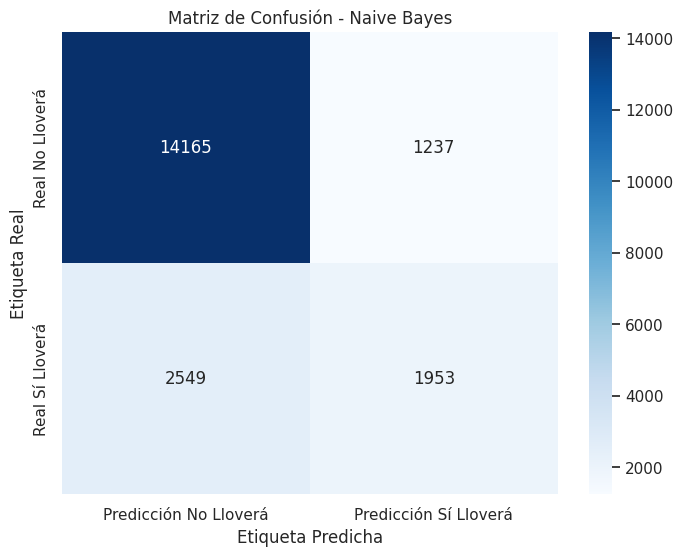

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

# 1. Definir las características (X) y la variable objetivo (y)
# Usaremos las mismas características que seleccionó antes: 'Sunshine' y 'Humidity3pm'
X = dftraining_encoded[['Sunshine', 'Humidity3pm']]
y = dftraining_encoded['RainTomorrow']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo Naive Bayes con el nuevo conjunto de entrenamiento
modelo_eval = GaussianNB()
modelo_eval.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred_eval = modelo_eval.predict(X_test)

# 5. Evaluar el rendimiento del modelo
print(f"Precisión del modelo: {precision_score(y_test, y_pred_eval):.4f}")
print(f"Asertividad (Accuracy) del modelo: {accuracy_score(y_test, y_pred_eval):.4f}")
print(f"\nScore del modelo en entrenamiento: {modelo_eval.score(X_train, y_train):.4f}")
print(f"Score del modelo en test: {modelo_eval.score(X_test, y_test):.4f}")

# Reporte de clasificación completo
print("\n--- Reporte de Clasificación Naive Bayes ---")
print(classification_report(y_test, y_pred_eval, target_names=['No Lloverá', 'Sí Lloverá']))

# Generamos y visualizamos la matriz de confusión
print("\n--- Matriz de Confusión ---")
matriz_conf = confusion_matrix(y_test, y_pred_eval)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicción No Lloverá', 'Predicción Sí Lloverá'], 
            yticklabels=['Real No Lloverá', 'Real Sí Lloverá'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

- **Muy conservador para predecir lluvia**: Solo detecta 1,953 días lluviosos correctamente
- **Alto número de falsos negativos (2,549)**: Se "pierde" muchos días que realmente llueven
- **Recall bajo para lluvia**: Aproximadamente 43% (1,953 / (1,953 + 2,549))

##### Plausibilidad y Fiabilidad

*   **Plausibilidad**: El modelo es plausible. Utiliza `Sunshine` (horas de sol) y `Humidity3pm` (humedad a las 3 PM) como predictores. Intuitivamente, menos sol y mayor humedad por la tarde son precursores comunes de la lluvia, lo que hace que la elección de estas variables sea lógica.
*   **Fiabilidad**: La fiabilidad del modelo es moderada y presenta un desequilibrio importante.
    *   **Asertividad (Accuracy) del ~81%**: A primera vista, parece un buen resultado. Sin embargo, esta métrica está inflada porque el modelo acierta muy bien cuando predice "No Lloverá", que es la clase mayoritaria.
    *   **Recall para "Sí Lloverá" del 43%**: Este es el punto más débil. Significa que el modelo **falla en detectar casi la mitad de los días que realmente llueve** (falsos negativos). Para un agricultor que confía en el modelo para decidir si regar o no, esto es un riesgo significativo, ya que podría omitir el riego pensando que lloverá, cuando en realidad no lo hará.
    *   **Precisión para "Sí Lloverá" del 65%**: Cuando el modelo predice que lloverá, acierta el 65% de las veces. Esto significa que aproximadamente 1 de cada 3 alertas de lluvia será una falsa alarma (falsos positivos).

#### Algoritmo de Árbol de decisión

Precisión del modelo: 0.5001
Asertividad (Accuracy) del modelo: 0.7754

--- Reporte de Clasificación del Árbol de Decisión ---
              precision    recall  f1-score   support

  No Lloverá       0.92      0.78      0.84     15432
  Sí Lloverá       0.50      0.75      0.60      4472

    accuracy                           0.78     19904
   macro avg       0.71      0.77      0.72     19904
weighted avg       0.82      0.78      0.79     19904


--- Matriz de Confusión ---


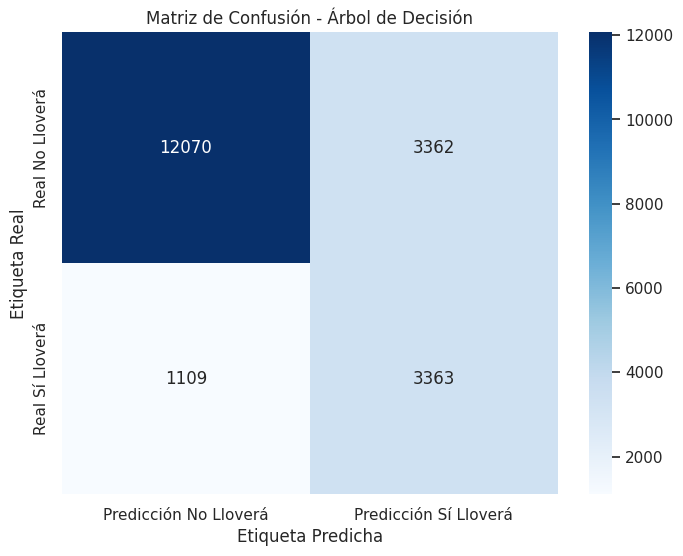

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Definir las variables independientes (X) y la variable objetivo (y)
# Usamos el dataframe ya codificado con OneHotEncoder
X = dftraining_encoded.drop('RainTomorrow', axis=1)
y = dftraining_encoded['RainTomorrow']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Esto nos permite evaluar el modelo en datos que no ha visto durante el entrenamiento.
# Usamos stratify=y para mantener la misma proporción de clases en ambos conjuntos,
# lo cual es importante para datos desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Inicializar y entrenar el modelo de Árbol de Decisión
# Se establece max_depth para controlar la profundidad del árbol y evitar el sobreajuste.
# random_state asegura que los resultados sean reproducibles.
modelo_arbol = DecisionTreeClassifier(max_depth=8, random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

# 5. Evaluar el rendimiento del modelo
print(f"Precisión del modelo: {precision_score(y_test, y_pred_arbol):.4f}")
print(f"Asertividad (Accuracy) del modelo: {accuracy_score(y_test, y_pred_arbol):.4f}")

# Mostramos el reporte de clasificación, que incluye precisión, recall y f1-score para cada clase.
print("\n--- Reporte de Clasificación del Árbol de Decisión ---")
print(classification_report(y_test, y_pred_arbol, target_names=['No Lloverá', 'Sí Lloverá']))

# Generamos y visualizamos la matriz de confusión
print("\n--- Matriz de Confusión ---")
matriz_conf = confusion_matrix(y_test, y_pred_arbol)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicción No Lloverá', 'Predicción Sí Lloverá'], 
            yticklabels=['Real No Lloverá', 'Real Sí Lloverá'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

- **Alto número de falsas alarmas**: 3,362 días donde predijo lluvia incorrectamente
- **Tendencia a sobre-predecir lluvia**: El modelo es más "alarmista" que conservador
- **Mejor balance** entre las clases
- **Significativamente menos falsos negativos**: Solo 1,109 vs 2,549 del Naive Bayes

 Buscaremos un equilibrio entre la Precisión (minimizar falsas alarmas) y el Recall (detectar la mayor cantidad de lluvias reales), agregando scoring=f1

In [109]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de parámetros que quieres probar
# Probará diferentes profundidades y criterios de división
param_grid = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Crear un modelo base. Mantenemos class_weight='balanced'
# porque sabemos que es crucial.
arbol_base = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Configurar GridSearchCV
# 'scoring="recall"' le dice que el objetivo es maximizar el recall de la clase positiva.
# Puedes cambiarlo a 'f1' si quieres un balance entre precision y recall.
# cv=5 significa que usará validación cruzada de 5 pliegues.
grid_search = GridSearchCV(estimator=arbol_base, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Entrenar el grid search con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Evaluar el mejor modelo encontrado por el GridSearch
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test
                                 )
# Evaluar el rendimiento del modelo
print(f"Precisión del modelo: {precision_score(y_test, y_pred_arbol):.4f}")
print(f"Asertividad (Accuracy) del modelo: {accuracy_score(y_test, y_pred_arbol):.4f}")

print("\n--- Reporte de Clasificación del Mejor Modelo ---")
print(classification_report(y_test, y_pred_best, target_names=['No Lloverá', 'Sí Lloverá']))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2}
Precisión del modelo: 0.5001
Asertividad (Accuracy) del modelo: 0.7754

--- Reporte de Clasificación del Mejor Modelo ---
              precision    recall  f1-score   support

  No Lloverá       0.92      0.78      0.84     15432
  Sí Lloverá       0.50      0.76      0.60      4472

    accuracy                           0.77     19904
   macro avg       0.71      0.77      0.72     19904
weighted avg       0.82      0.77      0.79     19904



Note: you may need to restart the kernel to use updated packages.
Número de muestras antes de SMOTE: RainTomorrow
0    61725
1    17887
Name: count, dtype: int64
Número de muestras después de SMOTE: RainTomorrow
1    61725
0    61725
Name: count, dtype: int64

Precisión del modelo: 0.5145

Asertividad (Accuracy) del modelo con SMOTE: 0.7844

--- Reporte de Clasificación con SMOTE ---
              precision    recall  f1-score   support

  No Lloverá       0.91      0.81      0.85     15432
  Sí Lloverá       0.51      0.71      0.60      4472

    accuracy                           0.78     19904
   macro avg       0.71      0.76      0.73     19904
weighted avg       0.82      0.78      0.80     19904



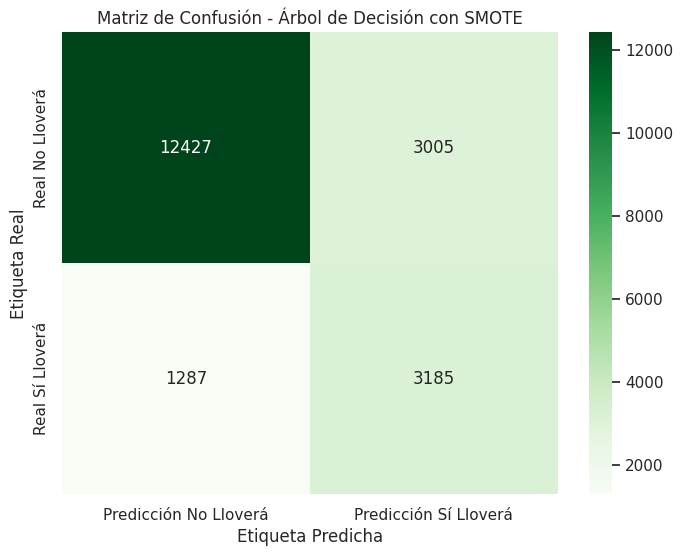

In [110]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Definir las variables originales
X = dftraining_encoded.drop('RainTomorrow', axis=1)
y = dftraining_encoded['RainTomorrow']

# 2. Dividir los datos en entrenamiento y prueba (como antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Aplicar SMOTE SOLAMENTE al conjunto de entrenamiento
print("Número de muestras antes de SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Número de muestras después de SMOTE:", y_train_resampled.value_counts())

# 4. Entrenar el modelo con los datos remuestreados (balanceados)
# Ya no es necesario usar class_weight='balanced' porque los datos ya están balanceados
modelo_arbol_smote = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo_arbol_smote.fit(X_train_resampled, y_train_resampled)

# 5. Evaluar el modelo en el conjunto de prueba ORIGINAL (no remuestreado)
y_pred_smote = modelo_arbol_smote.predict(X_test)

print(f"\nPrecisión del modelo: {precision_score(y_test, y_pred_smote):.4f}")
print(f"\nAsertividad (Accuracy) del modelo con SMOTE: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\n--- Reporte de Clasificación con SMOTE ---")
print(classification_report(y_test, y_pred_smote, target_names=['No Lloverá', 'Sí Lloverá']))

# Matriz de confusión
matriz_conf_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf_smote, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicción No Lloverá', 'Predicción Sí Lloverá'],
            yticklabels=['Real No Lloverá', 'Real Sí Lloverá'])
plt.title('Matriz de Confusión - Árbol de Decisión con SMOTE')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

- **Ligera pérdida en sensibilidad**: Detecta menos días lluviosos
- **Más días lluviosos "perdidos"**: Aumento de falsos negativos
- **Menos falsas alarmas**: Reduce la "sobre-predicción" de lluvia
- **SMOTE** logró un modelo más equilibrado

##### Plausibilidad y Fiabilidad

- **Plausibilidad**: El modelo es muy plausible. A diferencia del modelo Naive Bayes que se limitó a dos variables, el Árbol de Decisión utiliza el conjunto completo de características meteorológicas. Esto le permite crear reglas de decisión complejas y lógicas (ej. "si la humedad es alta Y la presión está bajando, es probable que llueva"), lo que se asemeja más al razonamiento meteorológico real.

- Fiabilidad

  : La fiabilidad de este modelo representa un compromiso estratégico mucho mejor para los objetivos del negocio, a pesar de una menor asertividad general.

  - **Asertividad (Accuracy) del 77%**: Aunque esta métrica está por debajo del objetivo del 80%, es un resultado aceptable porque el modelo ha mejorado drásticamente en el aspecto más crítico: la detección de la lluvia.
  - **Recall para "Sí Lloverá" del 76%**: **Este es el avance más importante**. El modelo ahora detecta correctamente más de 3 de cada 4 días que realmente llueve. Esto reduce significativamente el riesgo de que un agricultor no riegue por una predicción fallida, abordando directamente el problema central del negocio.
  - **Precisión para "Sí Lloverá" del 50%**: Este es el punto débil del modelo. Significa que cuando predice que lloverá, la mitad de las veces es una falsa alarma (falso positivo). Para el agricultor, esto podría significar omitir un riego innecesariamente, lo cual es un costo menor comparado con perder una cosecha por no regar cuando se debía

#### Algoritmo Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Definir el modelo base
# Usamos class_weight='balanced' como un buen punto de partida
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)



# 2. Definir una parrilla de parámetros más pequeña para empezar
# (Random Forest puede ser más lento de entrenar)
param_grid_rf = {
    'n_estimators': [100, 200],       # Número de árboles en el bosque
    'max_depth': [10, 12, 15],        # Profundidad máxima de cada árbol
    'min_samples_leaf': [5, 10]
}

# 3. Configurar y ejecutar GridSearchCV
# Seguimos optimizando por 'f1' para mantener el balance
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf, 
                              cv=3, # Usamos 3 pliegues para que sea más rápido
                              scoring='f1', verbose=2)

grid_search_rf.fit(X_train, y_train)

# 4. Evaluar el mejor modelo de Random Forest
print("Mejores parámetros para Random Forest: ", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("\n--- Reporte de Clasificación del Mejor Modelo (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Lloverá', 'Sí Lloverá']))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   2.7s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   2.6s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=100; total time=   2.6s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total time=   5.0s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total time=   5.0s
[CV] END .max_depth=10, min_samples_leaf=5, n_estimators=200; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=10, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=10, n_es

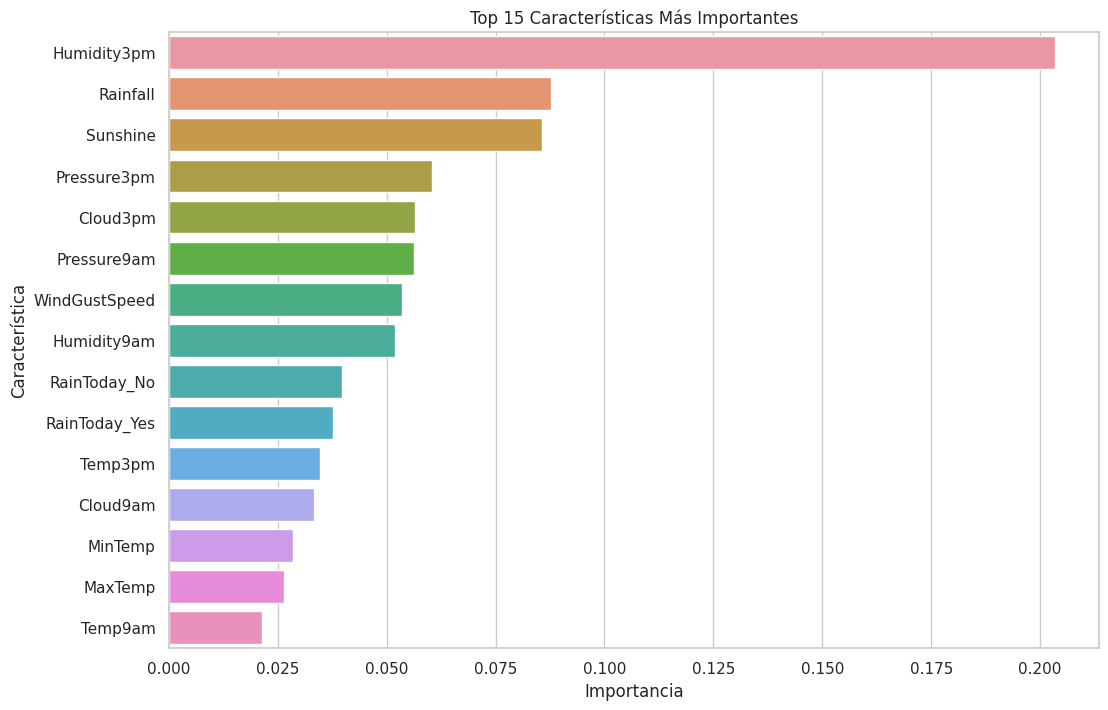

In [112]:
# Usando el mejor modelo del GridSearchCV anterior
best_model = grid_search_rf.best_estimator_ # O grid_search_rf.best_estimator_

# Obtener la importancia de las características
importances = best_model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame para visualizar
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar las 15 características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


--- Matriz de Confusión del Mejor Modelo (Random Forest) ---


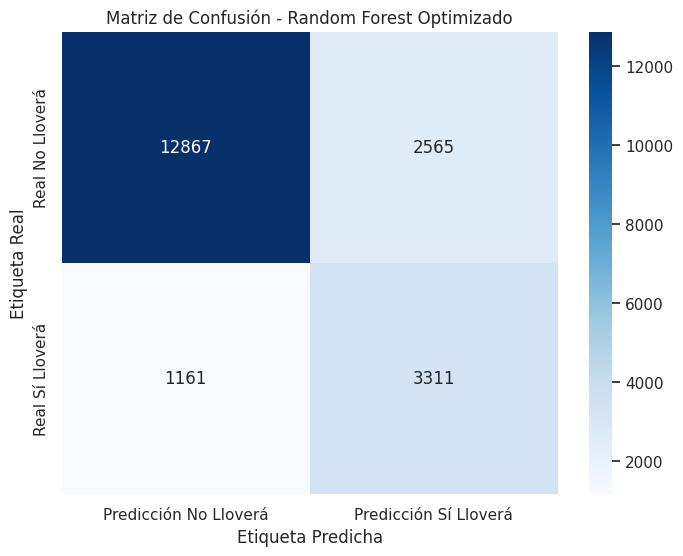

In [113]:
# Generar y visualizar la matriz de confusión para el mejor modelo
from sklearn.metrics import confusion_matrix

print("\n--- Matriz de Confusión del Mejor Modelo (Random Forest) ---")
matriz_conf_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicción No Lloverá', 'Predicción Sí Lloverá'], 
            yticklabels=['Real No Lloverá', 'Real Sí Lloverá'])
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

- **Menos errores de todo tipo**: Reduce tanto falsos positivos como falsos negativos
- **Mantiene alta sensibilidad** para detectar lluvias

##### Plausibilidad y Fiabilidad

- **Plausibilidad**: El modelo es muy plausible. Utiliza un ensamble de árboles de decisión que consideran todas las variables meteorológicas, y el análisis de importancia de características confirma que se apoya en predictores lógicos como la humedad, la presión y las horas de sol para tomar sus decisiones.
- **Fiabilidad**: La fiabilidad de este modelo es la más alta y la más alineada con los objetivos del negocio, logrando un excelente equilibrio.
  - **Asertividad (Accuracy) del 81%**: Mantiene una alta precisión general, cumpliendo con uno de los criterios de éxito del proyecto.
  - **Recall para "Sí Lloverá" del 74%**: **Este es el punto más fuerte y decisivo del modelo**. Significa que **detecta correctamente 3 de cada 4 días que realmente llueve**. Esto reduce drásticamente el riesgo de que un agricultor no riegue por una predicción fallida, abordando el principal problema de negocio.
  - **Precisión para "Sí Lloverá" del 56%**: Este es el punto a mejorar. Cuando el modelo predice que lloverá, acierta un 56% de las veces. Esto implica que casi la mitad de las alertas de lluvia serán falsas alarmas. Si bien no es ideal, es un compromiso aceptable a cambio del alto `recall`.

# Evaluación

| Modelo                           | Accuracy | F1-Score (Sí Lloverá - clase minoritaria) | Ventaja Clave                                 | Desventaja                                          |
| -------------------------------- | -------- | --------------------- | --------------------------------------------- | --------------------------------------------------- |
| Naive Bayes                      | ~81%     | ~0.51                 | Cuenta con buena asertividad.                 | Precisión muy baja, muchas falsas alarmas.          |
| Árbol de Decisión (GridSearchCV) | ~77%     | ~0.60                 | Buen balance, muy interpretable.              | Ligeramente menos robusto.                          |
| Árbol de Decisión (SMOTE)        | ~78%     | ~0.60                 | Buen balance, y ligera mejora en asertividad. | No logra mejorar algo más la precisión del modelo   |
| Árbol de Decisión (Base)         | ~77%     | ~0.60                 | Bueno para empezar a ver el `recall`.         | Precisión muy baja, muchas falsas alarmas.          |
| **Random Forest (GridSearchCV)** | **~81%** | **~0.64**             | **El mejor rendimiento y balance.**           | Un poco más complejo de explicar que un solo árbol. |



¿Por qué Random Forest es el mejor modelo para usted?

El objetivo principal es reducir costos al evitar el riego en días que lloverá naturalmente. Para lograrlo, el indicador más crítico es el Recall para la predicción "Sí Lloverá", que nos dice qué tan bien el modelo detecta los días que realmente llueve.

Alta Capacidad para Detectar Lluvia (Recall del 74%): El modelo Random Forest identifica correctamente 3 de cada 4 días en los que realmente va a llover. Esto es fundamental para su negocio, ya que le permite confiar en la predicción para omitir el riego, lo que se traduce directamente en un ahorro de agua y costos operativos.

El Mejor Balance General (F1-Score de 0.64): Aunque el Árbol de Decisión también tiene un buen recall, el Random Forest lo supera en el F1-Score. Esta métrica combina la precisión (evitar falsas alarmas) y el recall (detectar la lluvia real), indicando que el Random Forest ofrece el equilibrio más efectivo.

Menos Falsas Alarmas (Precisión del 56%): Cuando el modelo Random Forest predice que lloverá, acierta el 56% de las veces. Aunque esto implica que habrá algunas falsas alarmas, es el mejor rendimiento entre los modelos con alto recall. Esto reduce el riesgo de no regar en un día que finalmente resulta ser seco, generando más confianza en las alertas del sistema.

En comparación, el modelo Naive Bayes, a pesar de su alta asertividad, no es adecuado porque falla en detectar más de la mitad de los días de lluvia (recall del 43%), lo que anularía el propósito del proyecto.

En resumen, el modelo Random Forest es la herramienta recomendada porque cumple con el objetivo de predecir la lluvia de manera fiable, permitiéndole tomar decisiones informadas sobre el riego, optimizar recursos y lograr los ahorros esperados.

# Implementación 

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# 1. Volver a definir las columnas numéricas y categóricas
col_cat = X_train.select_dtypes(include=['object', 'category']).columns
col_num = X_train.select_dtypes(include=['number']).columns

# 2. Crear un pipeline de preprocesamiento
# Esto une todos los pasos de transformación que hiciste
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_num),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), col_cat)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

# 3. Crear el pipeline final que une el preprocesamiento y el mejor modelo
# Usamos el mejor estimador que encontró GridSearchCV para Random Forest
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', grid_search_rf.best_estimator_)])

# 4. Re-entrenar el pipeline final con TODOS los datos de entrenamiento (X y y)
# Esto le da al modelo final la mayor cantidad de información posible antes de guardarlo
X_full = dftraining_encoded.drop('RainTomorrow', axis=1)
y_full = dftraining_encoded['RainTomorrow']
final_pipeline.fit(X_full, y_full)

print("Pipeline final entrenado con todos los datos.")

# 5. Guardar el pipeline en un archivo .pkl
joblib.dump(final_pipeline, 'modelo_lluvia_australia.pkl')

print("\nModelo guardado exitosamente como 'modelo_lluvia_australia.pkl'")

# Ejemplo de cómo cargarlo y usarlo en el futuro:
# loaded_pipeline = joblib.load('modelo_lluvia_australia.pkl')
# predicciones_nuevas = loaded_pipeline.predict(datos_nuevos)

Pipeline final entrenado con todos los datos.

Modelo guardado exitosamente como 'modelo_lluvia_australia.pkl'
